# **Depression and Psychedelics**

```
UC San Diego: Data Science in Practice
Summer Session I 2023 | Instructor : C. Alex Simpkins Ph.D.
```



## Permissions

`* [ X ] YES - make available`

## Names

```
- Neha Sharma
- Vartan Pashayan
- Alexander Levine
- Sohaib Khan
- Sneha Sairam
```



# Overview

* With the rise of depression during these trying times, everyone is looking for that one solution, that one medicine, or drug that will help rid of this disease. This is where Psilocybin Mushrooms, commonly known as Psychedelic Mushrooms or Magic Mushrooms come in. These mushrooms, aren't just any mushrooms, they contain something called, Psilocybin. What is Psilocybin, you may ask. "Psilocybin, a classic hallucinogen, is a chemical produced by more than 100 species of mushrooms worldwide. It has high affinity for several serotonin receptors, including 5-HT1A, 5-HT2A, and 5-HT2C, located in numerous areas of the brain, including the cerebral cortex and thalamus." (Daniel and Haberman, 2018). The past few years have shown that there is a growing interest in using this drug as a potential treatment for depression. As a result, Psilocybin is heavily researched, is it that one drug that will solve everyone's problems? Have we found the solution? We shall found out....

## Research Question

* Does the use of psychedelic mushrooms (PM) decrease or increase the occurrence of depression among adults with depression? In addition, what variables in publicly accessible datasets can be used to investigate this question?



## Background & Prior Work

* Our topic discusses the use of psychedelic mushrooms to prevent depressive-like symptoms in people with depression or anxiety. Psilocybin is a naturally occurring compound found in psychedelic mushrooms, the past few years have shown that there is a growing interest in using this drug as a potential treatment for depression. And because of this there have been many articles and medical studies trying to figure out if this treatment can be a viable option for people dealing with depression.
In a 2020 John Hopkins study,  researchers conducted multiple studies that psilocybin could improve various mental health conditions including depression. Preliminary data suggest that psilocybin-assisted treatment produces substantial and rapid antidepressant effects in patients with major depressive disorder, but little is known about long-term outcomes.  Another study done by the British association of Psychopharmacology  shows that the effects of Psilocybin use can reduce anxiety and depression in cancer patients. It is worth noting that this article talks about giving Psilocybin to patients with cancer who experienced depression-like symptoms and not people with major depressive disorder.



```
References (include links):
- 1) Gukasyan N, Davis AK, Barrett FS, et al. Efficacy and safety of psilocybin-assisted treatment for major depressive disorder: Prospective 12-month follow-up. Journal of Psychopharmacology. 2022;36(2):151-158. doi:10.1177/02698811211073759
- 2) Griffiths RR, Johnson MW, Carducci MA, et al. Psilocybin produces substantial and sustained decreases in depression and anxiety in patients with life-threatening cancer: A randomizeddouble-blind trial. Journal of Psychopharmacology. 2016;30(12):1181-1197. doi:10.1177/0269881116675513
- 3) https://www.hopkinsmedicine.org/news/newsroom/news-releases/psychedelic-treatment-with-psilocybin-relieves-major-depression-study-shows

- 4) https://journals.sagepub.com/doi/full/10.1177/0269881116675513
```





## Hypothesis


- **Hypothesis**: The use of Psychedelic Mushrooms decreases the occurrence of depression among adults.

- **Null**: The use of Psychedelic Mushrooms increases the occurrence of depression among adults.


## Dataset

- **Dataset Name**: Psychedelic mushrooms in the USA: knowledge, patterns of use, and association with health outcomes
- **Link to the dataset**: https://datadryad.org/stash/dataset/doi:10.5061/dryad.bzkh189b6
- **Number of observations**: 7,139
- **Description**: A 2021 nationwide survey in the USA which explored psychedelic drug use among adults, examining prevalence, comorbid conditions, mental/physical health, and predictive factors. Data was collected through an online survey with a representative sample and analyzed using SPSS v27.0.1.0.

# Data Wrangling & Configuration


```
We did not have to preform much data wrangling to produce a usable dataset. Our raw data is in csv file format,
making it easy and efficient to read in. We used the read_csv function from the pandas package.
```



In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest, f_oneway

In [161]:
df = pd.read_csv('https://datadryad.org/stash/downloads/file_stream/1212469')

In [162]:
df_transcript = pd.read_csv('https://datadryad.org/stash/downloads/file_stream/1212468')

In [163]:
# Configure libraries
# The seaborn library makes plots look nicer
sns.set(context = 'talk', style='white')

# Round decimals when displaying DataFrames
pd.set_option('display.precision', 2)

# Make plots just slightly bigger for displaying well in notebook
# set plotting size parameter
plt.rcParams['figure.figsize'] = (10, 5)

# Data Cleaning

* Much cleaning was required as there were many repetitive columns and unreadable values/column names. Here are the steps that were taken!

```
1. Delete unnecessary columns + all other drug users
2. Change column names
3. Normalize columns
4. Preliminary plots
5. Cleaning up values, switching numbers to actual values so dataframe is readable
```




**I. Preliminary checks to understand the shape, size, and dynamics of our data.**

In [164]:
df.shape

(7139, 57)

In [165]:
null_rows = df.isnull().any(axis = 1).sum()
null_rows

0

In [166]:
df.describe().round(2)

,CASEID_7139,COHORTS,PYS_USE_VENN,PSY_USE_YN,PM_USE_YN,PM_USE_ONLY_YN,PM_VS_PSY_YN,SEX,AGE,ETHNICITY,HLS_YN,REGION,ED,EMPL,INCOME,BMI,C_TOTAL,C_DP,C_ANX,C_PN,C_ALL,C_MI,C_INSOM,C_HYP,C_DH,C_SA,C_GERD,C_CS,C_LIP,CCI_SCORE,GAD7_SCORE,PHQ9_SCORE,GAD7_GE10,PHQ9_GE10,PCS12,MCS12,VR6D,RU_PCP_YN,RU_SPECIAL_YN,RU_OTPCP_YN,RU_UCC_YN,RU_OUTPT_YN,RU_ER_YN,RU_HSP_YN,PSY1_POSITIVE_USE,PSY2_GEN_HEALTH,PSY2_DIAG_CONDITION,PSY2_UNDIAG_CONCERN,PSY2_NO_KNOWLEDGE,PM1_GEN_HEALTH,PM1_DIAG_CONDITION,PM1_UNDIAG_CONCERN,PM2_FREQ_COVID,PM3_FREQ_POLITICS,PM4_CARE,INSURANCE,DATA_WEIGHT
count,7139.0,7139.00,7139.00,7139.00,7139.00,7139.00,7139.00,7139.00,7139.00,7139.00,7139.00,7139.00,7139.00,7139.00,7139.00,7139.00,7139.00,7139.00,7139.00,7139.00,7139.00,7139.0,7139.00,7139.00,7139.00,7139.00,7139.00,7139.00,7139.00,7139.00,7139.00,7139.00,7139.00,7139.00,7139.00,7139.00,7139.00,7139.00,7139.00,7139.00,7139.00,7139.00,7139.00,7139.00,7139.00,7139.00,7139.00,7139.0,7139.00,7139.00,7139.00,7139.00,7139.00,7139.00,7139.00,7139.00,7139.00
mean,3570.0,-5.59,0.17,0.07,0.04,0.02,-91.60,0.46,46.15,1.95,0.08,2.63,0.73,0.30,64563.71,28.02,4.10,0.31,0.36,0.45,0.29,0.2,0.21,0.22,0.14,0.08,0.13,0.14,0.14,0.46,6.33,7.33,0.28,0.33,45.13,44.70,0.68,0.52,0.28,0.21,0.12,0.09,0.11,0.05,3.43,0.19,0.19,0.1,0.65,-95.41,-95.42,-95.43,-95.36,-95.36,-95.44,0.85,35200.66
std,2061.0,22.88,0.64,0.26,0.19,0.13,26.25,0.50,16.65,0.51,0.27,1.00,0.45,0.46,26258.63,7.25,3.64,0.46,0.48,0.50,0.46,0.4,0.41,0.42,0.35,0.27,0.34,0.34,0.35,1.00,5.89,6.99,0.45,0.47,10.34,12.54,0.12,0.50,0.45,0.41,0.32,0.28,0.32,0.21,1.25,0.40,0.39,0.3,0.48,18.56,18.51,18.49,18.87,18.88,18.45,0.36,12235.15
min,1.0,-99.00,0.00,0.00,0.00,0.00,-99.00,0.00,18.00,1.00,0.00,1.00,0.00,0.00,9076.00,11.16,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.94,0.69,0.31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.0,0.00,-99.00,-99.00,-99.00,-99.00,-99.00,-99.00,0.00,13803.31
25%,1785.5,0.00,0.00,0.00,0.00,0.00,-99.00,0.00,33.00,2.00,0.00,2.00,0.00,0.00,46322.50,23.05,1.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,38.32,36.53,0.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,0.00,0.00,0.0,0.00,-99.00,-99.00,-99.00,-99.00,-99.00,-99.00,1.00,28356.81
50%,3570.0,0.00,0.00,0.00,0.00,0.00,-99.00,0.00,43.00,2.00,0.00,3.00,1.00,0.00,58129.00,26.58,3.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,5.00,0.00,0.00,47.14,45.51,0.68,1.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,0.00,0.00,0.0,1.00,-99.00,-99.00,-99.00,-99.00,-99.00,-99.00,1.00,31296.20
75%,5354.5,0.00,0.00,0.00,0.00,0.00,-99.00,1.00,60.00,2.00,0.00,3.00,1.00,1.00,77263.00,31.42,6.00,1.00,1.00,1.00,1.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.00,12.00,1.00,1.00,53.61,54.98,0.77,1.00,1.00,0.00,0.00,0.00,0.00,0.00,5.00,0.00,0.00,0.0,1.00,-99.00,-99.00,-99.00,-99.00,-99.00,-99.00,1.00,40791.23
max,7139.0,1.00,3.00,1.00,1.00,1.00,2.00,1.00,95.00,3.00,1.00,4.00,1.00,1.00,237841.00,73.12,28.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,9.00,21.00,27.00,1.00,1.00,69.93,72.67,0.97,1.00,1.00,1.00,1.00,1.00,1.00,1.00,5.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00,4.00,4.00,1.00,1.00,143149.75


**II. Correlation matrix to understand what factors affected depression.**

In [167]:
df.columns

Index(['CASEID_7139', 'COHORTS', 'PYS_USE_VENN', 'PSY_USE_YN', 'PM_USE_YN',
       'PM_USE_ONLY_YN', 'PM_VS_PSY_YN', 'SEX', 'AGE', 'ETHNICITY', 'HLS_YN',
       'REGION', 'ED', 'EMPL', 'INCOME', 'BMI', 'C_TOTAL', 'C_DP', 'C_ANX',
       'C_PN', 'C_ALL', 'C_MI', 'C_INSOM', 'C_HYP', 'C_DH', 'C_SA', 'C_GERD',
       'C_CS', 'C_LIP', 'CCI_SCORE', 'GAD7_SCORE', 'PHQ9_SCORE', 'GAD7_GE10',
       'PHQ9_GE10', 'PCS12', 'MCS12', 'VR6D', 'RU_PCP_YN', 'RU_SPECIAL_YN',
       'RU_OTPCP_YN', 'RU_UCC_YN', 'RU_OUTPT_YN', 'RU_ER_YN', 'RU_HSP_YN',
       'PSY1_POSITIVE_USE', 'PSY2_GEN_HEALTH', 'PSY2_DIAG_CONDITION',
       'PSY2_UNDIAG_CONCERN', 'PSY2_NO_KNOWLEDGE', 'PM1_GEN_HEALTH',
       'PM1_DIAG_CONDITION', 'PM1_UNDIAG_CONCERN', 'PM2_FREQ_COVID',
       'PM3_FREQ_POLITICS', 'PM4_CARE', 'INSURANCE', 'DATA_WEIGHT'],
      dtype='object')

In [168]:
selected_columns = df[['CASEID_7139', 'COHORTS', 'PYS_USE_VENN', 'PSY_USE_YN', 'PM_USE_YN',
       'PM_USE_ONLY_YN', 'PM_VS_PSY_YN', 'SEX', 'AGE', 'ETHNICITY', 'HLS_YN',
       'REGION', 'ED', 'EMPL', 'INCOME', 'BMI', 'C_TOTAL', 'C_DP', 'C_ANX',
       'C_PN', 'C_ALL', 'C_MI', 'C_INSOM', 'C_HYP', 'C_DH', 'C_SA', 'C_GERD',
       'C_CS', 'C_LIP', 'CCI_SCORE', 'GAD7_SCORE', 'PHQ9_SCORE', 'GAD7_GE10',
       'PHQ9_GE10', 'PCS12', 'MCS12', 'VR6D', 'RU_PCP_YN', 'RU_SPECIAL_YN',
       'RU_OTPCP_YN', 'RU_UCC_YN', 'RU_OUTPT_YN', 'RU_ER_YN', 'RU_HSP_YN',
       'PSY1_POSITIVE_USE', 'PSY2_GEN_HEALTH', 'PSY2_DIAG_CONDITION',
       'PSY2_UNDIAG_CONCERN', 'PSY2_NO_KNOWLEDGE', 'PM1_GEN_HEALTH',
       'PM1_DIAG_CONDITION', 'PM1_UNDIAG_CONCERN', 'PM2_FREQ_COVID',
       'PM3_FREQ_POLITICS', 'PM4_CARE', 'INSURANCE', 'DATA_WEIGHT']]

# Calculate the correlation matrix between these columns
correlation_matrix = selected_columns.corr()

# Access the correlation value between "C_DP" and each other column
correlation_with_c_dp = correlation_matrix["C_DP"]

# Sort correlation_with_c_dp in descending order
sorted_correlation_with_c_dp = correlation_with_c_dp.sort_values(ascending=False)

sorted_correlation_with_c_dp.head(10)

C_DP          1.00
C_ANX         0.62
C_TOTAL       0.49
PHQ9_SCORE    0.48
GAD7_SCORE    0.45
PHQ9_GE10     0.42
GAD7_GE10     0.36
C_INSOM       0.28
C_PN          0.23
C_MI          0.22
Name: C_DP, dtype: float64

From the correlation matrix, we can see that depression is most correlated with anxiety (C_ANX), insomnia (C_INSOM), and chronic pain (C_PN).

**III. Rudimentary plots to see the relationship between different features.**

* This is a plot that compares people using only Psychedlic Mushrooms (PMs) vs Not using them at all and the depression they experienced. 1.0 Represents people using PMs and 0.0 represents people not using any PMs.

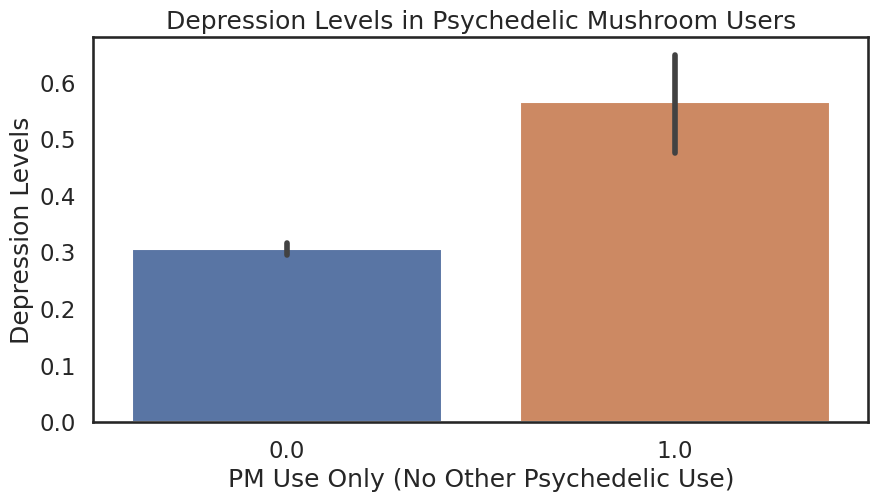

In [169]:
#Plot for PM use only (no other psychedelic use) and it's affect on depression
plot_no_psy = sns.barplot(x='PM_USE_ONLY_YN', y = 'C_DP', data = df)

# Adding labels for the axes
plt.xlabel('PM Use Only (No Other Psychedelic Use)')
plt.ylabel('Depression Levels')
plt.title('Depression Levels in Psychedelic Mushroom Users')

# Show the plot
plt.show()

* This next plot compares people using any type of Psychedlics vs Not using them at all and the depression they experienced. 1.0 Represents people using Psychedelics and 0.0 represents people not using any psychedelics.

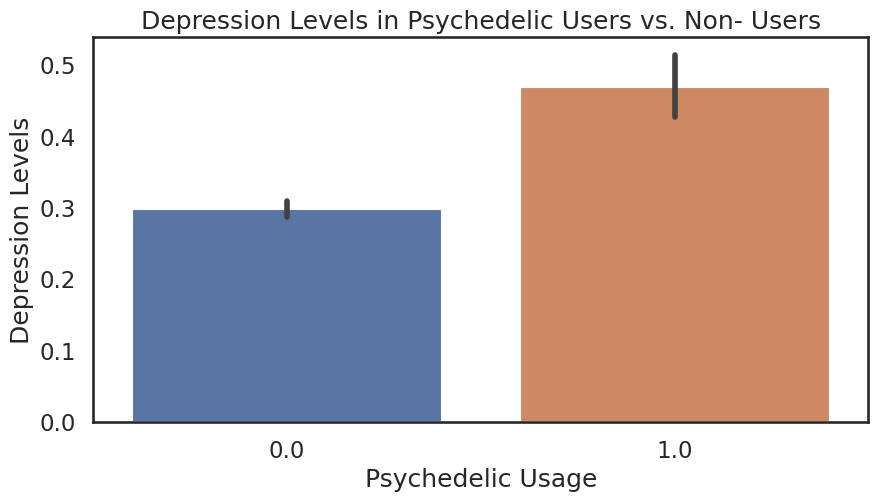

In [170]:
#Plot for Affect PM depression w/Any Psychedlic use
plot_psy = sns.barplot(x='PSY_USE_YN', y = 'C_DP', data = df)

# Adding labels for the axes
plt.xlabel('Psychedelic Usage')
plt.ylabel('Depression Levels')
plt.title('Depression Levels in Psychedelic Users vs. Non- Users')

# Show the plot
plt.show()

* This next plot compares people using any type of Psychedelics vs PMs vs Not using Psychelics at all and the depression they experienced. 1.0 Represents people using PMs only, 0.0 represents people not using any psychedelics, and -99.0 represents all other Psychedelic Users

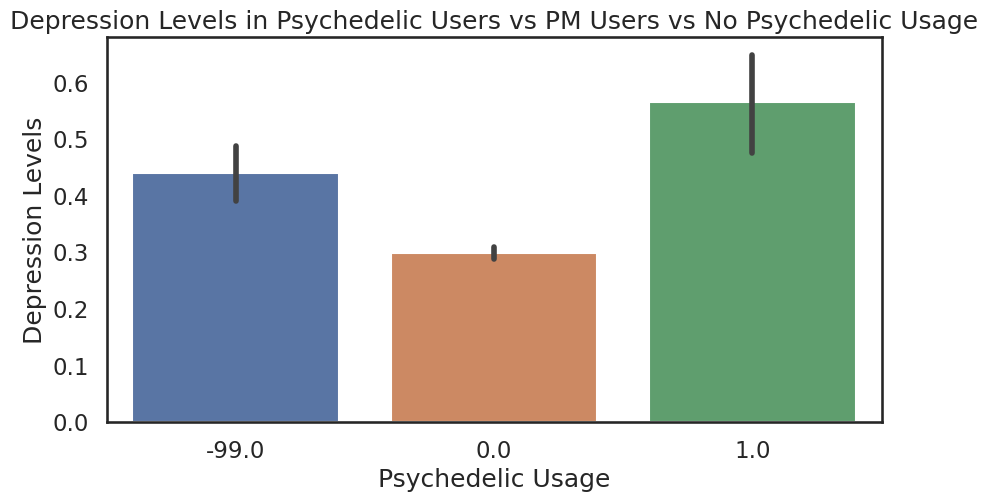

In [171]:
comparison = sns.barplot(x='COHORTS', y = 'C_DP', data = df)

# Adding labels for the axes
plt.xlabel('Psychedelic Usage')
plt.ylabel('Depression Levels')
plt.title('Depression Levels in Psychedelic Users vs PM Users vs No Psychedelic Usage')

# Show the plot
plt.show()

**IV. We realized that some of the numerical entries in the data were unnecessary and made it hard to understand. We replaced some of the numerical entires with their corresponding meanings.**

In [172]:
df['PSY_USE_YN'].replace(to_replace=1, value='yes', inplace=True)
df['PSY_USE_YN'].replace(to_replace=0, value='no', inplace=True)
df['PM_USE_YN'].replace(to_replace=1, value='yes', inplace=True)
df['PM_USE_YN'].replace(to_replace=0, value='no', inplace=True)
df['PM_USE_ONLY_YN'].replace(to_replace=1, value='yes', inplace=True)
df['PM_USE_ONLY_YN'].replace(to_replace=0, value='no', inplace=True)
df['C_DP'].replace(to_replace=1, value='yes', inplace=True)
df['C_DP'].replace(to_replace=0, value='no', inplace=True)
df['SEX'].replace(to_replace=0, value='female', inplace=True)
df['SEX'].replace(to_replace=1, value='male', inplace=True)

df['COHORTS'].replace(to_replace=0, value='no psy use', inplace=True)
df['COHORTS'].replace(to_replace=1, value='pm use only', inplace=True)
df['COHORTS'].replace(to_replace=-99, value='other psy users', inplace=True)
df['PYS_USE_VENN'].replace(to_replace=0, value="no psy use", inplace=True)
df['PYS_USE_VENN'].replace(to_replace=1, value="pm use only", inplace=True)
df['PYS_USE_VENN'].replace(to_replace=2, value="pm w/other psy", inplace=True)
df['PYS_USE_VENN'].replace(to_replace=3, value="psy w/no pm", inplace=True)
df["ETHNICITY"].replace(to_replace=1, value="black", inplace=True)
df["ETHNICITY"].replace(to_replace=2, value="white", inplace=True)
df["ETHNICITY"].replace(to_replace=3, value="other", inplace=True)
# Other stands for American Indian or Alaska Native, Asian, Native Hawaiian or Other Pacific Islander
df['HLS_YN'].replace(to_replace=1, value='yes', inplace=True)
df['HLS_YN'].replace(to_replace=0, value='no', inplace=True)
df['REGION'].replace(to_replace=1, value='northwest', inplace=True)
df['REGION'].replace(to_replace=2, value='midwest', inplace=True)
df['REGION'].replace(to_replace=3, value='south', inplace=True)
df['REGION'].replace(to_replace=4, value='west', inplace=True)
df['PSY1_POSITIVE_USE'].replace(to_replace=1, value='strongly agree', inplace=True)
df['PSY1_POSITIVE_USE'].replace(to_replace=2, value='agree', inplace=True)
df['PSY1_POSITIVE_USE'].replace(to_replace=3, value='neutral', inplace=True)
df['PSY1_POSITIVE_USE'].replace(to_replace=4, value='disagree', inplace=True)
df['PSY1_POSITIVE_USE'].replace(to_replace=5, value='strongly disagree', inplace=True)
df['PSY2_DIAG_CONDITION'].replace(to_replace=1, value='yes', inplace=True)
df['PSY2_DIAG_CONDITION'].replace(to_replace=0, value='no', inplace=True)
df['PM1_GEN_HEALTH'].replace(to_replace=0, value='no', inplace=True)
df['PM1_GEN_HEALTH'].replace(to_replace=1, value='yes', inplace=True)
df['PM1_GEN_HEALTH'].replace(to_replace=-99, value='not pm only', inplace=True)
df['PM1_DIAG_CONDITION'].replace(to_replace=0, value='no', inplace=True)
df['PM1_DIAG_CONDITION'].replace(to_replace=1, value='yes', inplace=True)
df['PM1_DIAG_CONDITION'].replace(to_replace=-99, value='not pm only', inplace=True)
df['PM1_UNDIAG_CONCERN'].replace(to_replace=0, value='no', inplace=True)
df['PM1_UNDIAG_CONCERN'].replace(to_replace=1, value='yes', inplace=True)
df['PM1_UNDIAG_CONCERN'].replace(to_replace=-99, value='not pm only', inplace=True)

**V. With this information we now felt confident in cleaning the data of unnecessary information unrelated to our project.**

In [173]:
#Renaming 'CASEID_7139' to just 'CASE ID' and setting it as index
df.rename(columns = {"CASEID_7139":"CASE_ID"}, inplace = True)
df.set_index("CASE_ID", inplace = True)
df

,COHORTS,PYS_USE_VENN,PSY_USE_YN,PM_USE_YN,PM_USE_ONLY_YN,PM_VS_PSY_YN,SEX,AGE,ETHNICITY,HLS_YN,REGION,ED,EMPL,INCOME,BMI,C_TOTAL,C_DP,C_ANX,C_PN,C_ALL,C_MI,C_INSOM,C_HYP,C_DH,C_SA,C_GERD,C_CS,C_LIP,CCI_SCORE,GAD7_SCORE,PHQ9_SCORE,GAD7_GE10,PHQ9_GE10,PCS12,MCS12,VR6D,RU_PCP_YN,RU_SPECIAL_YN,RU_OTPCP_YN,RU_UCC_YN,RU_OUTPT_YN,RU_ER_YN,RU_HSP_YN,PSY1_POSITIVE_USE,PSY2_GEN_HEALTH,PSY2_DIAG_CONDITION,PSY2_UNDIAG_CONCERN,PSY2_NO_KNOWLEDGE,PM1_GEN_HEALTH,PM1_DIAG_CONDITION,PM1_UNDIAG_CONCERN,PM2_FREQ_COVID,PM3_FREQ_POLITICS,PM4_CARE,INSURANCE,DATA_WEIGHT
CASE_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,pm use only,pm use only,yes,yes,yes,2.0,female,19.0,other,yes,west,0.0,0.0,65847,27.41,3.0,no,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,8.0,0.0,0.0,48.99,37.90,0.67,0,0,0,0,0,0,0,neutral,1,no,0,0,yes,no,no,2,3,0,0,57772.54
2,pm use only,pm use only,yes,yes,yes,2.0,female,21.0,white,no,midwest,1.0,0.0,30585,29.26,0.0,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.21,57.93,0.86,0,1,0,0,0,1,0,strongly agree,0,no,1,0,yes,no,no,3,3,0,1,25738.42
3,pm use only,pm use only,yes,yes,yes,2.0,female,22.0,white,no,west,0.0,0.0,49259,20.60,9.0,yes,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,21.0,17.0,1.0,1.0,33.83,25.91,0.47,0,0,0,1,0,1,0,neutral,1,yes,1,0,no,no,no,3,4,0,0,42172.56
4,pm use only,pm use only,yes,yes,yes,2.0,female,22.0,white,no,south,1.0,0.0,54135,18.56,2.0,yes,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,15.0,0.0,1.0,61.63,25.13,0.67,1,0,0,0,0,0,0,agree,1,yes,0,0,yes,no,no,3,3,0,1,28356.81
5,pm use only,pm use only,yes,yes,yes,2.0,female,23.0,white,no,midwest,0.0,1.0,49425,36.80,4.0,yes,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,15.0,1.0,1.0,38.54,45.53,0.64,0,0,1,0,0,1,0,agree,1,yes,1,0,yes,no,no,3,3,0,1,25738.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7135,other psy users,pm w/other psy,yes,yes,no,2.0,male,60.0,white,no,northwest,1.0,0.0,49677,22.47,3.0,no,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,14.0,11.0,1.0,1.0,55.18,46.86,0.73,0,1,0,0,0,0,0,strongly agree,1,yes,1,0,no,no,no,3,3,0,1,59464.33
7136,other psy users,psy w/no pm,yes,no,no,1.0,male,64.0,black,no,west,1.0,0.0,83209,40.24,4.0,no,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,38.33,38.54,0.60,1,1,0,0,0,0,0,neutral,0,no,0,1,not pm only,not pm only,not pm only,-99,-99,-99,1,15186.20
7137,other psy users,psy w/no pm,yes,no,no,1.0,male,64.0,white,no,west,1.0,0.0,63911,22.71,3.0,no,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,52.82,51.77,0.78,0,0,0,0,0,0,0,agree,1,yes,0,0,not pm only,not pm only,not pm only,-99,-99,-99,1,57633.55


In [174]:
#Dropping repetitive columns and columns not related to Depression as that is our main objective
pd.set_option('display.max_columns', None)

depression_only = df.drop(columns = ['C_TOTAL', 'HLS_YN','C_ALL','C_MI','C_HYP', 'C_DH', 'C_SA',
                                    'C_GERD', 'C_CS', 'C_LIP', 'CCI_SCORE', 'PCS12',
                                    'MCS12', 'VR6D', 'RU_PCP_YN', 'RU_SPECIAL_YN', 'RU_OTPCP_YN', 'RU_UCC_YN',
                                    'RU_OUTPT_YN', 'RU_ER_YN', 'RU_HSP_YN', 'PSY2_GEN_HEALTH','PSY2_UNDIAG_CONCERN',
                                     'PM2_FREQ_COVID', 'PM3_FREQ_POLITICS', 'PM4_CARE', 'INSURANCE',
                                    'DATA_WEIGHT', 'PSY2_NO_KNOWLEDGE', 'PM_VS_PSY_YN', 'COHORTS', 'PSY_USE_YN',
                                    'PM_USE_YN', 'PM_USE_ONLY_YN'])

depression_only
# IF GAD7 (General Anxiety Disorder Scale) Score > 10, then they have moderate to severe anxiety
# IF PHQ9 (Patient Health Questionare) Score > 10, then they have moderate to severe depression

,PYS_USE_VENN,SEX,AGE,ETHNICITY,REGION,ED,EMPL,INCOME,BMI,C_DP,C_ANX,C_PN,C_INSOM,GAD7_SCORE,PHQ9_SCORE,GAD7_GE10,PHQ9_GE10,PSY1_POSITIVE_USE,PSY2_DIAG_CONDITION,PM1_GEN_HEALTH,PM1_DIAG_CONDITION,PM1_UNDIAG_CONCERN
CASE_ID,,,,,,,,,,,,,,,,,,,,,,
1,pm use only,female,19.0,other,west,0.0,0.0,65847,27.41,no,1.0,0.0,0.0,3.0,8.0,0.0,0.0,neutral,no,yes,no,no
2,pm use only,female,21.0,white,midwest,1.0,0.0,30585,29.26,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,strongly agree,no,yes,no,no
3,pm use only,female,22.0,white,west,0.0,0.0,49259,20.60,yes,1.0,1.0,0.0,21.0,17.0,1.0,1.0,neutral,yes,no,no,no
4,pm use only,female,22.0,white,south,1.0,0.0,54135,18.56,yes,1.0,0.0,0.0,5.0,15.0,0.0,1.0,agree,yes,yes,no,no
5,pm use only,female,23.0,white,midwest,0.0,1.0,49425,36.80,yes,1.0,0.0,0.0,13.0,15.0,1.0,1.0,agree,yes,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7135,pm w/other psy,male,60.0,white,northwest,1.0,0.0,49677,22.47,no,1.0,0.0,0.0,14.0,11.0,1.0,1.0,strongly agree,yes,no,no,no
7136,psy w/no pm,male,64.0,black,west,1.0,0.0,83209,40.24,no,0.0,1.0,1.0,4.0,4.0,0.0,0.0,neutral,no,not pm only,not pm only,not pm only
7137,psy w/no pm,male,64.0,white,west,1.0,0.0,63911,22.71,no,0.0,0.0,0.0,3.0,3.0,0.0,0.0,agree,yes,not pm only,not pm only,not pm only


In [175]:
# Rename columns to increase readability

renamed_columns = renamed_columns = ['psy_use_venn', 'sex', 'age', 'ethnicity', 'region', 'education',
                   'empl', 'income', 'bmi', 'depression', 'anxiety', 'chronic_pain','insomnia', 'gad7_score',
                   'phq9_score','severe_anxiety','severe_depression','psy1_positive_use', 'psy2_diag_condition',
                   'pm1_gen_health', 'pm1_diag_condition', 'pm1_undiag_concern']

depression_only.columns = renamed_columns

In [176]:
del df
df = depression_only

In [177]:
df

,psy_use_venn,sex,age,ethnicity,region,education,empl,income,bmi,depression,anxiety,chronic_pain,insomnia,gad7_score,phq9_score,severe_anxiety,severe_depression,psy1_positive_use,psy2_diag_condition,pm1_gen_health,pm1_diag_condition,pm1_undiag_concern
CASE_ID,,,,,,,,,,,,,,,,,,,,,,
1,pm use only,female,19.0,other,west,0.0,0.0,65847,27.41,no,1.0,0.0,0.0,3.0,8.0,0.0,0.0,neutral,no,yes,no,no
2,pm use only,female,21.0,white,midwest,1.0,0.0,30585,29.26,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,strongly agree,no,yes,no,no
3,pm use only,female,22.0,white,west,0.0,0.0,49259,20.60,yes,1.0,1.0,0.0,21.0,17.0,1.0,1.0,neutral,yes,no,no,no
4,pm use only,female,22.0,white,south,1.0,0.0,54135,18.56,yes,1.0,0.0,0.0,5.0,15.0,0.0,1.0,agree,yes,yes,no,no
5,pm use only,female,23.0,white,midwest,0.0,1.0,49425,36.80,yes,1.0,0.0,0.0,13.0,15.0,1.0,1.0,agree,yes,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7135,pm w/other psy,male,60.0,white,northwest,1.0,0.0,49677,22.47,no,1.0,0.0,0.0,14.0,11.0,1.0,1.0,strongly agree,yes,no,no,no
7136,psy w/no pm,male,64.0,black,west,1.0,0.0,83209,40.24,no,0.0,1.0,1.0,4.0,4.0,0.0,0.0,neutral,no,not pm only,not pm only,not pm only
7137,psy w/no pm,male,64.0,white,west,1.0,0.0,63911,22.71,no,0.0,0.0,0.0,3.0,3.0,0.0,0.0,agree,yes,not pm only,not pm only,not pm only


# Data Visualization

**Background information:** The PHQ-9 score is a set of 9 questions that doctors use to gauge whether a patient may be depressed. The questions ask about feelings like sadness, lack of interest in activities, sleep issues, appetite changes, feelings of failure, trouble concentrating, restlessness, and thoughts of self-harm. Patients rate how often they've felt each symptom in the past 2 weeks on a scale from 0 (not at all) to 3 (nearly every day).  And the tallies are added up the higher the score the worse health the patient is in  with 27 being the highest score, this helps doctors understand the severity of the potential depression.



```
0-4: Minimal depression
5-9: Mild depression
10-14: Moderate depression
15-19: Moderately severe depression
20-27: Severe depression
```



*Kroenke K, Spitzer RL, Williams JB. The PHQ-9: validity of a brief depression severity measure. J Gen Intern Med. 2001 Sep;16(9):606-13. doi: 10.1046/j.1525-1497.2001.016009606.x. PMID: 11556941; PMCID: PMC1495268.*

## Depression & Psychedelic Mushroom


```
Firstly we generated plots to visualize the relationship between depression and PM use in the general population.
```



* The below graph is a lineplot comparing the PHQ9 Score of people using PM only vs no Psychedelics usage vs Psychedelics with not PM vs PM with other Psychedelics.

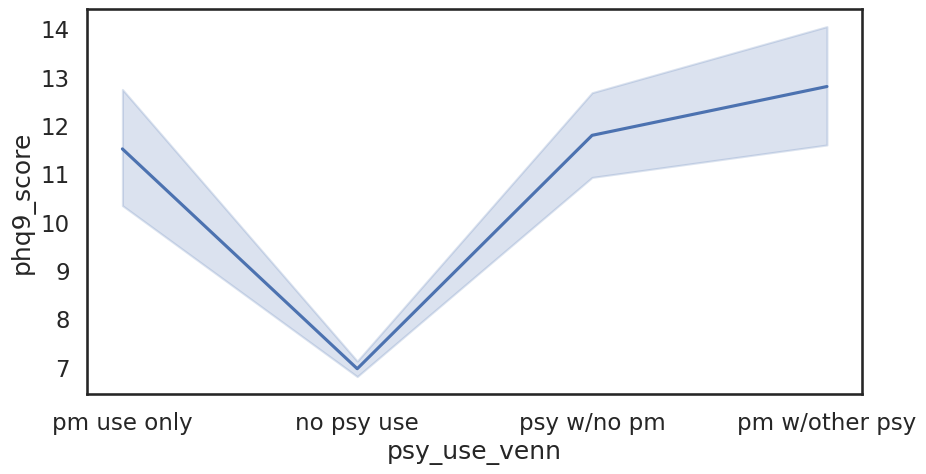

In [178]:
plot_dep = sns.lineplot(x='psy_use_venn', y = 'phq9_score', legend = 'full', data = df)
#plot_dep = sns.barplot(x='psy_use_venn', hue = 'depression', data = df)

* Below is the barplot representation of the above lineplot.

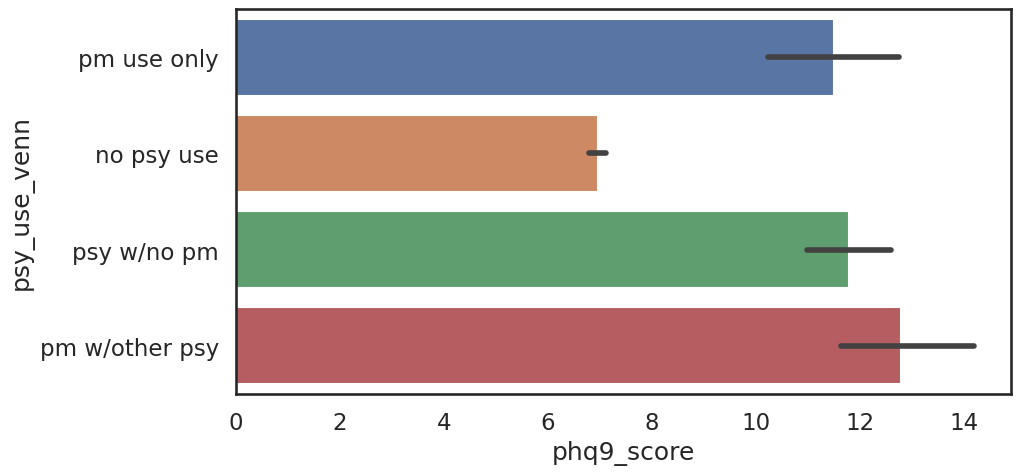

In [179]:
dep_bar = sns.barplot(x='phq9_score', y = 'psy_use_venn', data = df)


* The below plot represent people's PHQ9 Score after using Psychedelics in the last 12 months vs PM only usage in the last 12 months vs not using any Psychedelics in the last 12 months

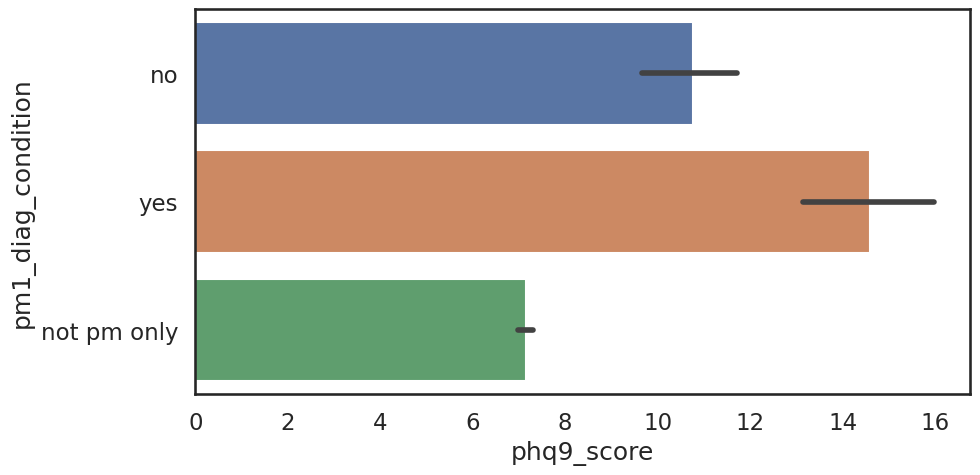

In [180]:
#Used PM specifically for improving depression, PTSD, addiction, etc
dep_bar = sns.barplot(x='phq9_score', y = 'pm1_diag_condition', data = df)

**Analysis: From our superficial analysis thusfar it seems that psychedelic mushroom usage actually causes depression to increase. Our plan is to look deeper into what other features impact the interaction between psychedelic mushroom usage and depression. We will begin a more in depth analysis by exploring the top 3 most correlated features with depression obtained from the correlation matrix we calculated earlier.**



#Data Analysis & Results

For the analysis portion of our project, we explore the relationship between depression and psychedelic use along with other potentially important factors. We analyze whether there's a difference in depression scores between psychedelic users and non-psychedelic users among those with and without anxiety, chronic pain, and insomnia as well as those from different demographics. To do this, we create new sub-dataframes to compare those with and without anxiety for example and then plot the results. To further investigate the results gathered from the plots, we run a few statistical tests such as the T-test, ANOVA test, and multivariate regression analysis using various Python libraries. We also use a few engineering tricks such as pivot tables to help us plot our results more effectively.

## Anxiety

```
As anxiety appears to be the most prominent feature correlated with depression based on our correlation matrix,
we will compare the experiences of people with anxiety who use psychedelic mushrooms to those of individuals without anxiety.
This will help us understand how anxiety might influence depression levels in psychedelic mushroom users.


We will explore:
- Do those who suffer from anxiety react differently to psychedelic usage than those who do not suffer from anxiety?
```



#### **I. Anxiety vs. Depression**



```
Here we will explore the relationship between anxiety and depression in none psychedelic users as a baseline.
```



In [181]:
df["psy_use_venn"].unique()

array(['pm use only', 'no psy use', 'psy w/no pm', 'pm w/other psy'],
      dtype=object)

In [182]:
# Change binary entries to categorical
df['anxiety'].replace(to_replace = 0, value = 'no', inplace = True)
df['anxiety'].replace(to_replace = 1, value = 'yes', inplace = True)

df["anxiety"].value_counts()

no     4602
yes    2537
Name: anxiety, dtype: int64

11.17125382262997
4.73149861239593


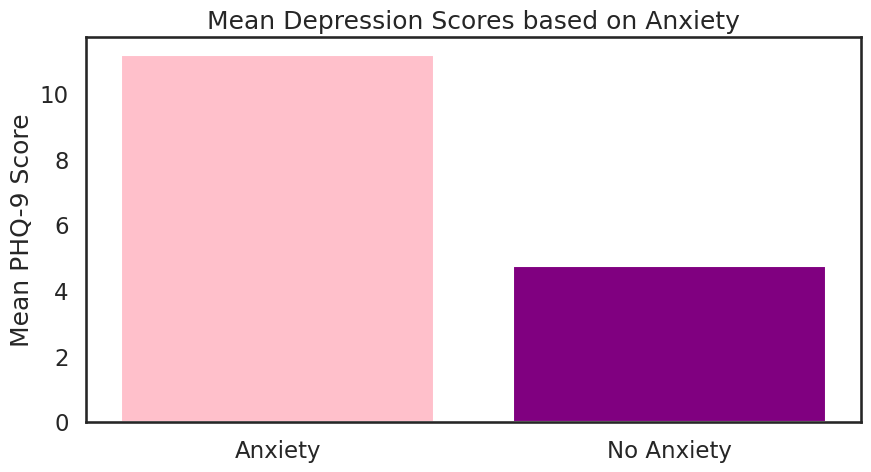

In [183]:
# Separate data based on anxiety & no psych usage
anxiety = df[(df["anxiety"] == 'yes') & (df["psy_use_venn"] == 'no psy use')]
no_anxiety = df[(df["anxiety"] == 'no') & (df["psy_use_venn"] == 'no psy use')]
# Filter for none

# Calculate the mean depression score for both cohorts
mean_anxiety = anxiety['phq9_score'].mean()
mean_no_anxiety = no_anxiety['phq9_score'].mean()

print(mean_anxiety)
print(mean_no_anxiety)

# Plot the means using a bar plot
plt.bar(['Anxiety', 'No Anxiety'], [mean_anxiety, mean_no_anxiety], color=['pink', 'purple'])
plt.ylabel('Mean PHQ-9 Score')
plt.title('Mean Depression Scores based on Anxiety')
plt.show()

In [184]:
t_val, p_val = ttest_ind(anxiety['phq9_score'], no_anxiety['phq9_score'])
print(p_val)

0.0


**Analysis**: It is evident anxiety and depression are heavily correlated. Those who experienced anxiety had a drastically higher average depression score than those who did not experience anxiety. In addition, the p-value is near zero, thus further supporting this finding.

#### **II. Anxiety & Psychedelic Mushroom Use vs. Depression**


```
Now, we will explore how psychedelic mushroom usage affected the relationship between anxiety & depression.
```



In [185]:
# Seperate data based on anxiety & PM usage
anxiety_and_PM = df[(df["anxiety"] == 'yes') & (df["psy_use_venn"] == 'pm use only')]
no_anxiety_and_PM = df[(df["anxiety"] == 'no') & (df["psy_use_venn"] == 'pm use only')]

# Calculate the mean depression for both cohorts
mean_anxiety = anxiety_and_PM['phq9_score'].mean()
mean_no_anxiety = no_anxiety_and_PM['phq9_score'].mean()

print(mean_anxiety)
print(mean_no_anxiety)

12.836065573770492
10.180327868852459


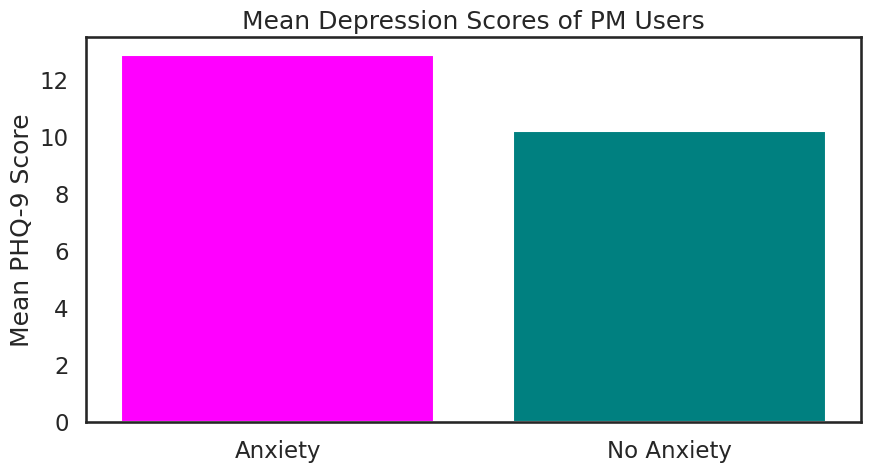

In [186]:
# Plot the means using a bar plot
plt.bar(['Anxiety', 'No Anxiety'], [mean_anxiety, mean_no_anxiety], color=['magenta', 'teal'])
plt.ylabel('Mean PHQ-9 Score')
plt.title('Mean Depression Scores of PM Users')
plt.show()

In [187]:
t_val, p_val = ttest_ind(anxiety_and_PM['phq9_score'], no_anxiety_and_PM['phq9_score'])
print(p_val)

0.03619038555358457


**Analysis**: Given that the p-value is less than 0.05, it seems that depression is a predictor of anxiety in psychedelic mushroom users.

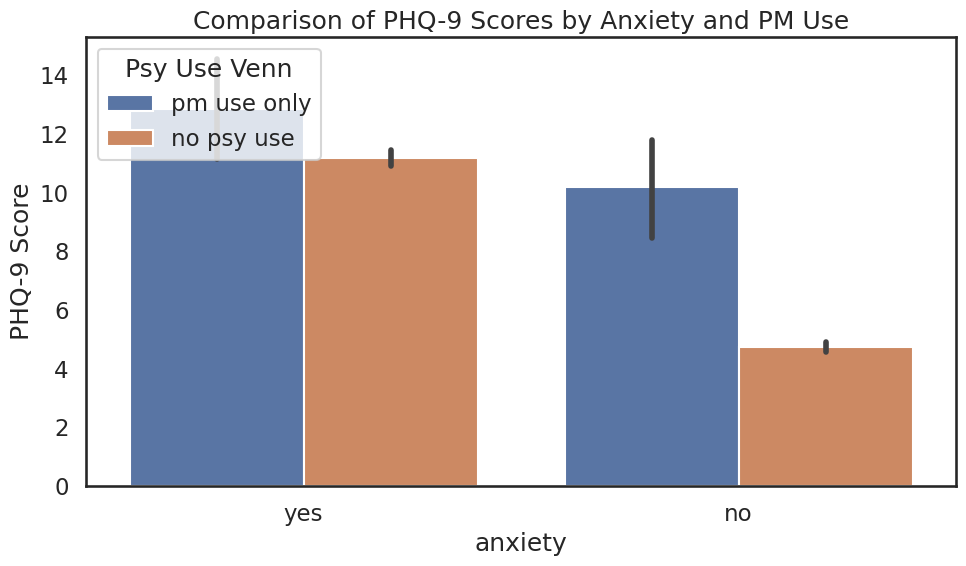

In [188]:
#now compare pm users and non pm users

df_filtered = df[df['psy_use_venn'].isin(['no psy use', 'pm use only'])]

plt.figure(figsize=(10, 6))

sns.barplot(data=df_filtered,
            x='anxiety',
            y='phq9_score',
            hue='psy_use_venn')

plt.xlabel('anxiety')
plt.ylabel('PHQ-9 Score')
plt.title('Comparison of PHQ-9 Scores by Anxiety and PM Use')

plt.legend(title='Psy Use Venn', loc='upper left')

plt.tight_layout()
plt.show()

In [189]:
#see if theres a statistically significant difference between PM users and non pm users

p_values = {}
for anxiety in df_filtered['anxiety'].unique():
    df_no_psy = df_filtered[(df_filtered['anxiety'] == anxiety) & (df_filtered['psy_use_venn'] == 'no psy use')]
    df_pm_only = df_filtered[(df_filtered['insomnia'] == anxiety) & (df_filtered['psy_use_venn'] == 'pm use only')]
    t_stat, p_value = stats.ttest_ind(df_no_psy['phq9_score'], df_pm_only['phq9_score'])
    p_values[anxiety] = p_value


print("P-values for anxiety (no and yes):")
for anxiety, p_value in p_values.items():
    print(f"{anxiety}: {p_value}")

P-values for anxiety (no and yes):
yes: nan
no: nan


**Analysis:** PHQ-9 scores seem to be higher for PM users vs non-PM users among those with and without anxiety, which is supported by the p-values.

## Chronic Pain


```
Chronic pain is the second most prominent feature correlated with depression based on our correlation matrix,
we will compare the depression levels of people with chronic pain who use psychedelic mushrooms to those of individuals
without chronic pain. This will help us understand how chronic pain might influence depression levels in psychedelic mushroom users.

Question:
- Do those who are suffering from chronic pain react differently to psychedelic usage than those who do not suffer from chronic pain?
```



#### **I. Chronic Pain vs. Depression**

In [190]:
# Change binary entries to categorical
df['chronic_pain'].replace(to_replace = 0, value = 'no', inplace = True)
df['chronic_pain'].replace(to_replace = 1, value = 'yes', inplace = True)

df["chronic_pain"].value_counts()

no     3957
yes    3182
Name: chronic_pain, dtype: int64

8.588998975059788
5.667390124796527


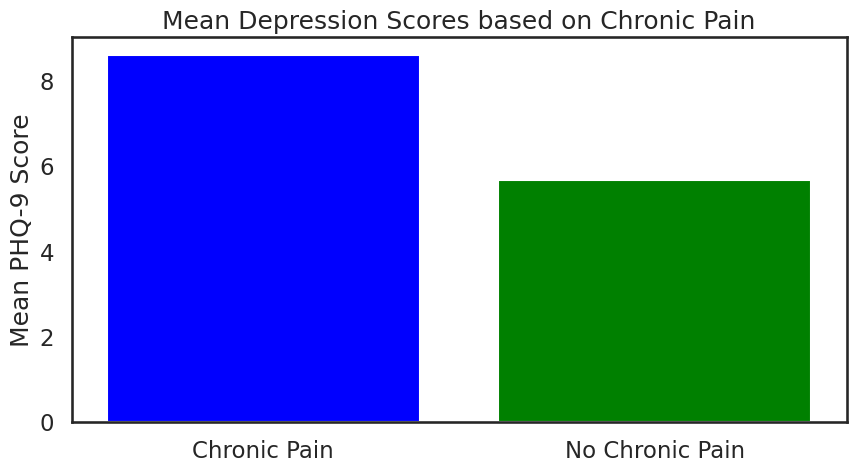

In [191]:
# Separate data based on chronic pain
chronic_pain = df[(df["chronic_pain"] == 'yes') & (df["psy_use_venn"] == 'no psy use')]
no_chronic_pain = df[(df["chronic_pain"] == 'no') & (df["psy_use_venn"] == 'no psy use')]

df[(df["chronic_pain"] == 'yes') & (df["psy_use_venn"] == 'pm use only')]

# Calculate the mean depression score for both cohorts
mean_chronic_pain = chronic_pain['phq9_score'].mean()
mean_no_chronic_pain = no_chronic_pain['phq9_score'].mean()

print(mean_chronic_pain)
print(mean_no_chronic_pain)

# Plot the means using a bar plot
plt.bar(['Chronic Pain', 'No Chronic Pain'], [mean_chronic_pain, mean_no_chronic_pain], color=['blue', 'green'])
plt.ylabel('Mean PHQ-9 Score')
plt.title('Mean Depression Scores based on Chronic Pain')
plt.show()

In [192]:
t_val, p_val = ttest_ind(chronic_pain['phq9_score'], no_chronic_pain['phq9_score'])
print(p_val)

5.069711437219057e-68


**Analysis**: *Those who experience chronic pain also have a higher average depression score. More specifically, 2.82 points higher. In addition, the p-value is close to zero, indicating that the difference is statistically significant.*

#### **II. Chronic Pain & Psychedelic Mushroom Use vs. Depression**

In [193]:
df["psy_use_venn"].value_counts()

no psy use        6613
psy w/no pm        270
pm w/other psy     134
pm use only        122
Name: psy_use_venn, dtype: int64

11.0
11.96875


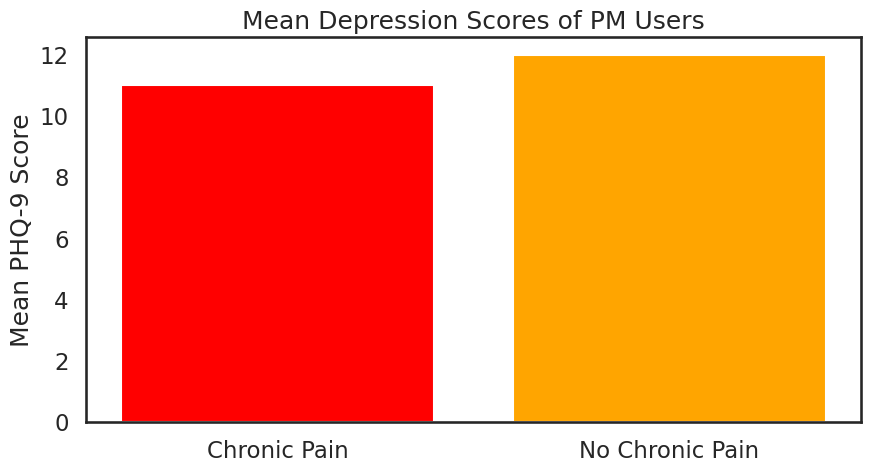

In [194]:
# Seperate data based on chronic pain
chronic_pain_and_PM = df[(df["chronic_pain"] == 'yes') & (df["psy_use_venn"] == 'pm use only')]
no_chronic_pain_and_PM = df[(df["chronic_pain"] == 'no') & (df["psy_use_venn"] == 'pm use only')]

# Calculate the mean depression for both cohorts
mean_chronic_pain_and_PM = chronic_pain_and_PM['phq9_score'].mean()
mean_no_chronic_pain_and_PM = no_chronic_pain_and_PM['phq9_score'].mean()

print(mean_chronic_pain_and_PM)
print(mean_no_chronic_pain_and_PM)

# Plot the means using a bar plot
plt.bar(['Chronic Pain', 'No Chronic Pain'], [mean_chronic_pain_and_PM, mean_no_chronic_pain_and_PM], color=['red', 'orange'])
plt.ylabel('Mean PHQ-9 Score')
plt.title('Mean Depression Scores of PM Users')
plt.show()

In [195]:
#T-test to see if results are statistically significant

t_val, p_val = ttest_ind(chronic_pain_and_PM['phq9_score'], no_chronic_pain_and_PM['phq9_score'])
print(p_val)

0.4489587504696082


**Analysis**: *People with chronic pain have slightly lower depression scores when using psychedelic mushrooms– however, the difference is minimal. Given that the p-value obtained from the t-test is around 0.45, the difference doesn't seem statistically significant.*

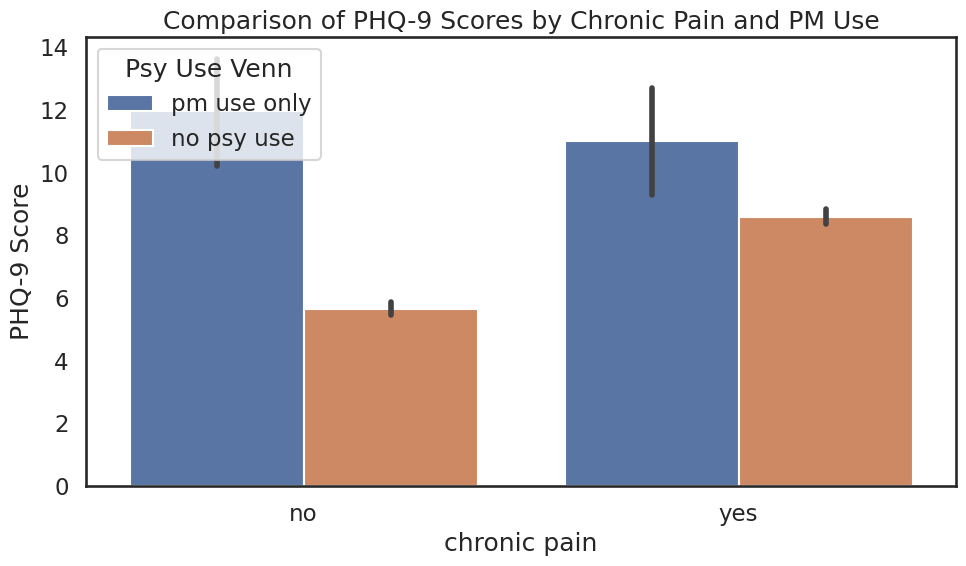

In [196]:
#now compare pm users and non pm users

df_filtered = df[df['psy_use_venn'].isin(['no psy use', 'pm use only'])]

plt.figure(figsize=(10, 6))

sns.barplot(data=df_filtered,
            x='chronic_pain',
            y='phq9_score',
            hue='psy_use_venn')

plt.xlabel('chronic pain')
plt.ylabel('PHQ-9 Score')
plt.title('Comparison of PHQ-9 Scores by Chronic Pain and PM Use')

plt.legend(title='Psy Use Venn', loc='upper left')

plt.tight_layout()
plt.show()

In [197]:
#see if theres a statistically significant difference between PM users and non pm users

p_values = {}
for pain in df_filtered['chronic_pain'].unique():
    df_no_psy = df_filtered[(df_filtered['chronic_pain'] == pain) & (df_filtered['psy_use_venn'] == 'no psy use')]
    df_pm_only = df_filtered[(df_filtered['chronic_pain'] == pain) & (df_filtered['psy_use_venn'] == 'pm use only')]
    t_stat, p_value = stats.ttest_ind(df_no_psy['phq9_score'], df_pm_only['phq9_score'])
    p_values[pain] = p_value


print("P-values for insomnia (no and yes):")
for pain, p_value in p_values.items():
    print(f"{pain}: {p_value}")

P-values for insomnia (no and yes):
no: 1.0061103036790239e-14
yes: 0.009652624170789144


**Analysis:** PHQ-9 scores seem to be higher for PM users vs non-PM users among those with and without chronic pain, which is supported by the p-values.

## Insomnia



```
Potential things to explore:
- Are those who are suffering from insomnia react differently to psychedelic usage than those who do not suffer from insomnia?
```



#### **I. Insomnia vs. Depression**

In [198]:
# Change binary entries to categorical
df['insomnia'].replace(to_replace = 0, value = 'no', inplace = True)
df['insomnia'].replace(to_replace = 1, value = 'yes', inplace = True)

df["insomnia"].value_counts()

no     5613
yes    1526
Name: insomnia, dtype: int64

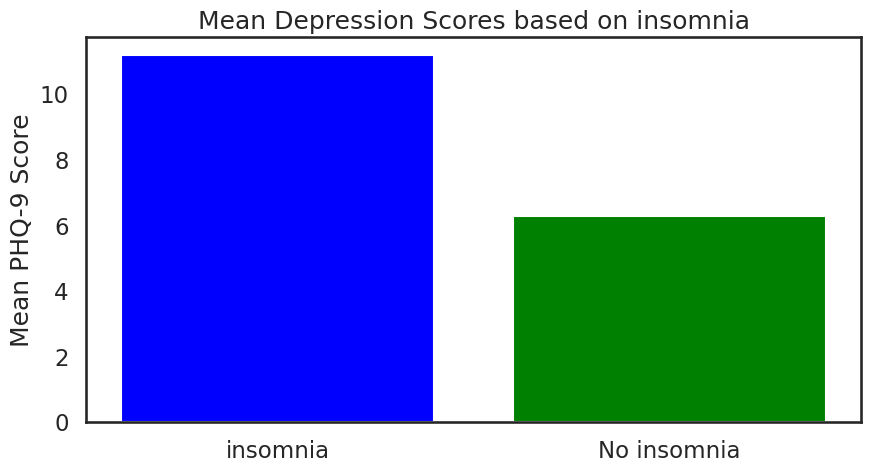

In [199]:
# Separate data based on insomnia
insomnia = df[df["insomnia"] == 'yes']
no_insomnia = df[df["insomnia"] == 'no']

# Calculate the mean depression score for both cohorts
mean_insomnia = insomnia['phq9_score'].mean()
mean_no_insomnia = no_insomnia['phq9_score'].mean()

# Plot the means using a bar plot
plt.bar(['insomnia', 'No insomnia'], [mean_insomnia, mean_no_insomnia], color=['blue', 'green'])
plt.ylabel('Mean PHQ-9 Score')
plt.title('Mean Depression Scores based on insomnia')
plt.show()

#### **II. Insomnia & Psychedelic Mushroom Use vs. Depression**

13.621621621621621
10.588235294117647


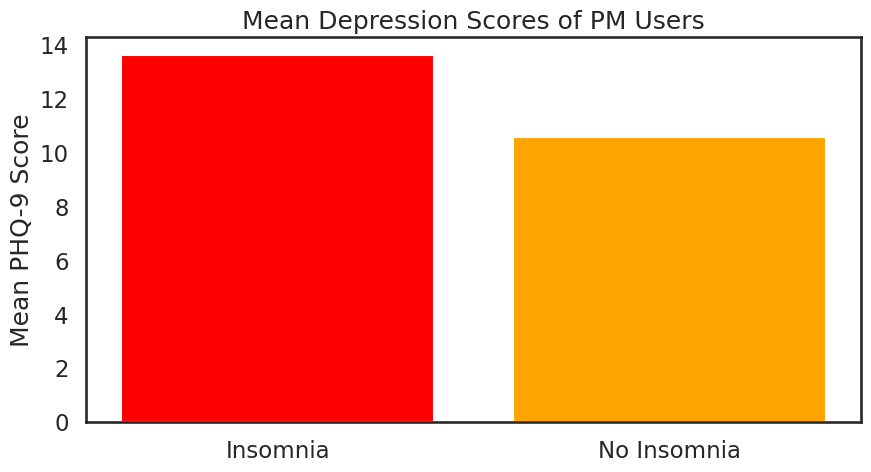

In [200]:
# Seperate data based on Insomnia
insomnia_and_PM = df[(df["insomnia"] == 'yes') & (df["psy_use_venn"] == 'pm use only')]
no_insomnia_and_PM = df[(df["insomnia"] == 'no') & (df["psy_use_venn"] == 'pm use only')]

# Calculate the mean depression for both cohorts
mean_insomnia_and_PM = insomnia_and_PM['phq9_score'].mean()
mean_no_insomnia_and_PM = no_insomnia_and_PM['phq9_score'].mean()

print(mean_insomnia_and_PM)
print(mean_no_insomnia_and_PM)

# Plot the means using a bar plot
plt.bar(['Insomnia', 'No Insomnia'], [mean_insomnia_and_PM, mean_no_insomnia_and_PM], color=['red', 'orange'])
plt.ylabel('Mean PHQ-9 Score')
plt.title('Mean Depression Scores of PM Users')
plt.show()

In [201]:
t_val, p_val = ttest_ind(insomnia_and_PM['phq9_score'], no_insomnia_and_PM['phq9_score'])
print(p_val)

0.027679682509364163


Analysis Given that the p-value is less than 0.05, it seems that the difference in depression scores between pm users with insomnia and those without among PM users is statistically significant.

In [202]:
pv = pd.pivot_table(data = df, values = 'phq9_score', index = ['insomnia', 'psy_use_venn'])
pv

phq9_score
insomnia psy_use_venn              
no       no psy use            5.91
         pm use only          10.59
         pm w/other psy       11.53
         psy w/no pm          11.14
yes      no psy use           10.86
         pm use only          13.62
         pm w/other psy       15.90
         psy w/no pm          14.85

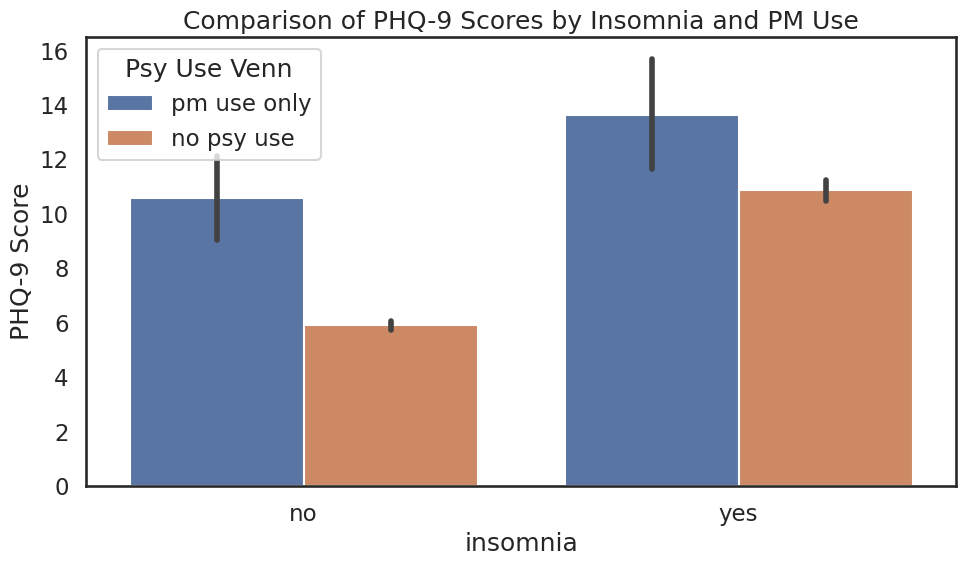

In [203]:
#now compare pm users and non pm users

df_filtered = df[df['psy_use_venn'].isin(['no psy use', 'pm use only'])]

plt.figure(figsize=(10, 6))

sns.barplot(data=df_filtered,
            x='insomnia',
            y='phq9_score',
            hue='psy_use_venn')

plt.xlabel('insomnia')
plt.ylabel('PHQ-9 Score')
plt.title('Comparison of PHQ-9 Scores by Insomnia and PM Use')

plt.legend(title='Psy Use Venn', loc='upper left')

plt.tight_layout()
plt.show()

In [204]:
#see if theres a statistically significant difference between PM users and non pm users

p_values = {}
for insomnia in df_filtered['insomnia'].unique():
    df_no_psy = df_filtered[(df_filtered['insomnia'] == insomnia) & (df_filtered['psy_use_venn'] == 'no psy use')]
    df_pm_only = df_filtered[(df_filtered['insomnia'] == insomnia) & (df_filtered['psy_use_venn'] == 'pm use only')]
    t_stat, p_value = stats.ttest_ind(df_no_psy['phq9_score'], df_pm_only['phq9_score'])
    p_values[insomnia] = p_value


print("P-values for insomnia (no and yes):")
for insomnia, p_value in p_values.items():
    print(f"{insomnia}: {p_value}")

P-values for insomnia (no and yes):
no: 2.2806712489703164e-11
yes: 0.020167046742169008


**Analysis:** PHQ-9 scores seem to be higher for PM users vs non-PM users among those with and without insomnia, which is supported by the p-values.

## Exploring Demographic Factors

#### **I. Ethnicity**

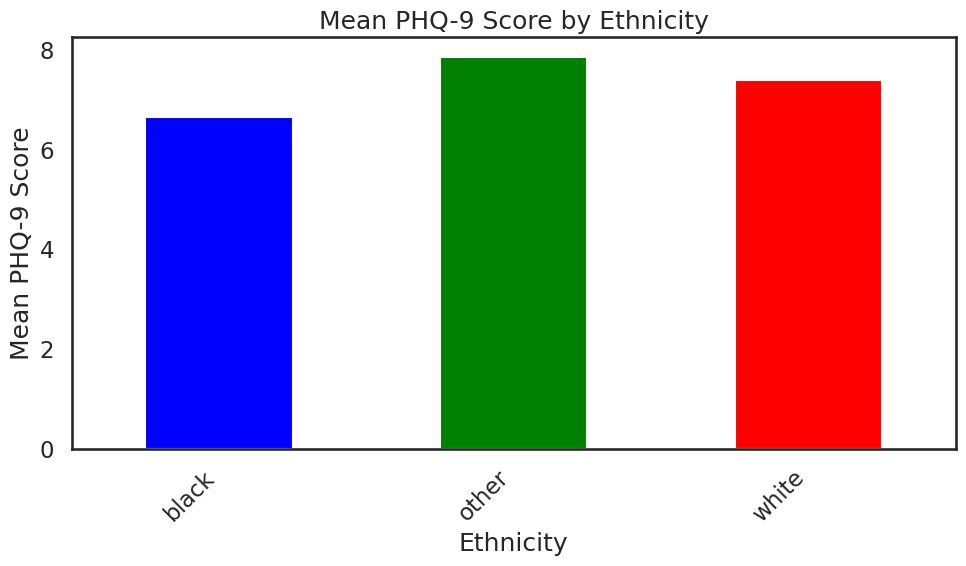

In [205]:
# Mean Depression scores by ethnicity
df_filtered = df.dropna(subset=['phq9_score', 'ethnicity'])

ethnicity_grouped = df_filtered.groupby('ethnicity')['phq9_score'].mean()

colors = ['blue', 'green', 'red', 'orange', 'purple']

plt.figure(figsize=(10, 6))
ethnicity_grouped.plot(kind='bar', color=colors)
plt.title('Mean PHQ-9 Score by Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Mean PHQ-9 Score')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()



In [206]:
#run an ANOVA test to see if there's a statistically significant difference between depression scores of different ethnicities
#need to use ANOVA if we're comparing more than two columns, which I learned about in my mathematical statistics class

group1 = df_filtered[df_filtered['ethnicity'] == 'black']['phq9_score']
group2 = df_filtered[df_filtered['ethnicity'] == 'other']['phq9_score']
group3 = df_filtered[df_filtered['ethnicity'] == 'white']['phq9_score']

f_statistic, p_value = f_oneway(group1, group2, group3)

print(p_value)

0.0005922533182151142


**Analysis**: The p-value is virtually zero, indicating that there is a statistically significant difference in depression scores by ethnicity.


In [207]:
# Now lets take a closer look at the difference in
# depression scores between different types of PM users based on ethnicity
pv = pd.pivot_table(data = df, values = 'phq9_score', index = ['ethnicity', 'psy_use_venn'])
pv

phq9_score
ethnicity psy_use_venn              
black     no psy use            6.36
          pm use only          10.27
          pm w/other psy       10.69
          psy w/no pm          12.26
other     no psy use            7.62
          pm use only          10.50
          pm w/other psy       13.76
          psy w/no pm          10.44
white     no psy use            6.99
          pm use only          11.80
          pm w/other psy       12.97
          psy w/no pm          11.81

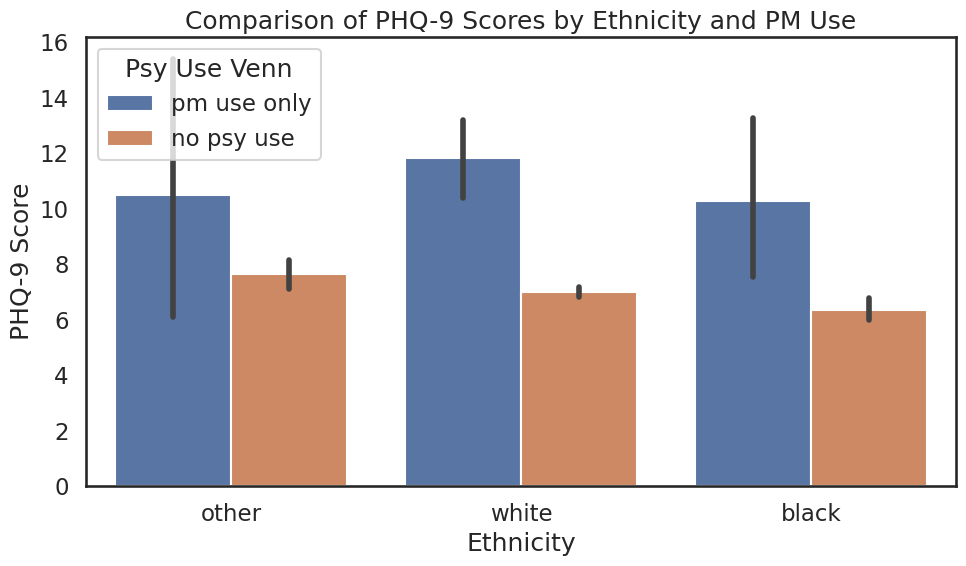

In [208]:
#plot depression scores by ethnicity for PM users and non-PM users

df_filtered = df[df['psy_use_venn'].isin(['no psy use', 'pm use only'])]

plt.figure(figsize=(10, 6))

sns.barplot(data=df_filtered,
            x='ethnicity',
            y='phq9_score',
            hue='psy_use_venn',)

plt.xlabel('Ethnicity')
plt.ylabel('PHQ-9 Score')
plt.title('Comparison of PHQ-9 Scores by Ethnicity and PM Use')

plt.legend(title='Psy Use Venn', loc='upper left')

plt.tight_layout()
plt.show()

In [209]:
#see if theres a statistically significant difference between PM users

p_values = {}
for ethnicity_group in df_filtered['ethnicity'].unique():
    df_no_psy = df_filtered[(df_filtered['ethnicity'] == ethnicity_group) & (df_filtered['psy_use_venn'] == 'no psy use')]
    df_pm_only = df_filtered[(df_filtered['ethnicity'] == ethnicity_group) & (df_filtered['psy_use_venn'] == 'pm use only')]
    t_stat, p_value = stats.ttest_ind(df_no_psy['phq9_score'], df_pm_only['phq9_score'])
    p_values[ethnicity_group] = p_value


print("P-values for each ethnicity:")
for ethnicity_group, p_value in p_values.items():
    print(f"{ethnicity_group}: {p_value}")

P-values for each ethnicity:
other: 0.2049105221999235
white: 8.141226501476903e-12
black: 0.023770569558476354


**Analysis:** It seems that for all demographics present in the study other than possibly the other demographic, PM users report significantly higher PHQ-9 scores than non-PM users.

#### **II. Age**



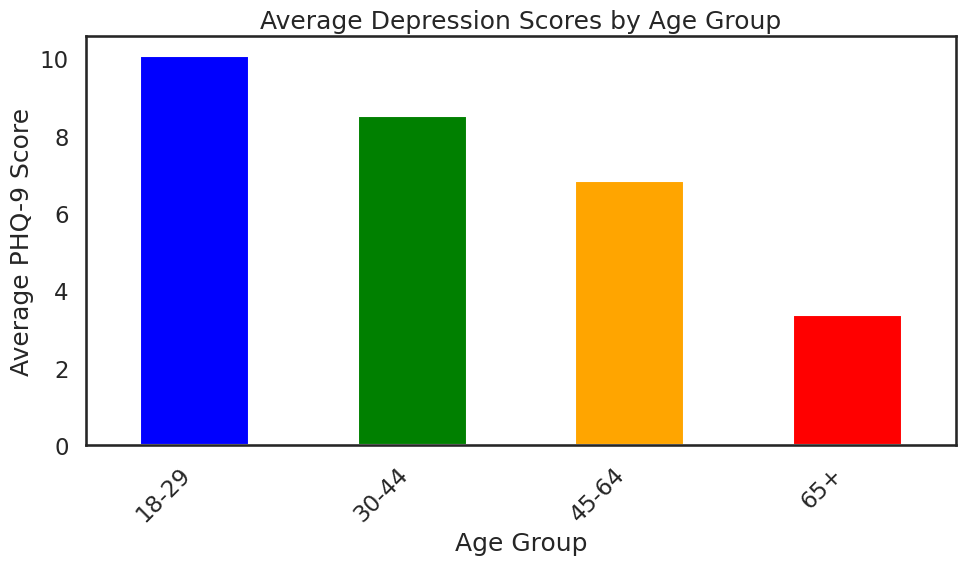

In [210]:
# Depression Scores by Age

df_filtered = df.dropna(subset=['phq9_score', 'age'])

# Define the age bins for grouping (based on commonly used conventions we've seen in many different places)
age_bins = [18, 30, 45, 65, df_filtered['age'].max()]

age_labels = ['18-29', '30-44', '45-64', '65+']

df_filtered['AgeGroup'] = pd.cut(df_filtered['age'], bins=age_bins, labels=age_labels, right=False)

average_depression_scores = df_filtered.groupby('AgeGroup')['phq9_score'].mean()

colors = ['blue', 'green', 'orange', 'red']

plt.figure(figsize=(10, 6))
average_depression_scores.plot(kind='bar', color=colors)
plt.title('Average Depression Scores by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average PHQ-9 Score')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [211]:
group1 = df_filtered[df_filtered['AgeGroup'] == '18-29']['phq9_score']
group2 = df_filtered[df_filtered['AgeGroup'] == '30-44']['phq9_score']
group3 = df_filtered[df_filtered['AgeGroup'] == '45-64']['phq9_score']
group4 = df_filtered[df_filtered['AgeGroup'] == '65+']['phq9_score']

f_statistic, p_value = f_oneway(group1, group2, group3, group4)

print(p_value)

3.6345602050639225e-161


The p-value is virtually zero, indicating that there is a statistically significant difference in depression scores by age. Also note that depression scores continually dectrease as people get older. It's possible that younger people may have more responsibilities and are facing more uncertainty.


<ipython-input-212-2d2bd1d1beee>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['age_group'] = pd.cut(df_filtered['age'], bins=age_brackets, labels=age_labels, right=False)


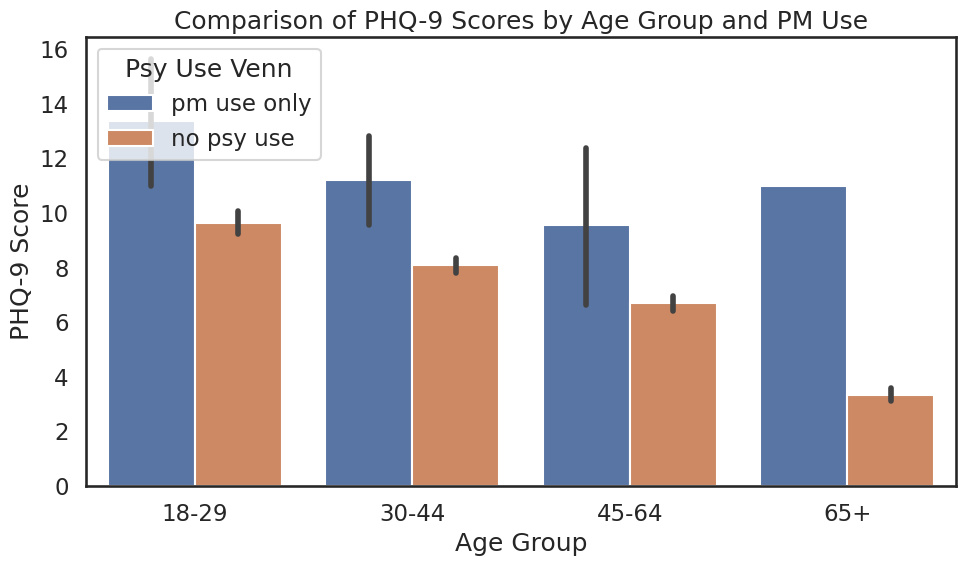

In [212]:
#plot depression scores for pm users and non pm users in different age brackets

df_filtered = df[df['psy_use_venn'].isin(['no psy use', 'pm use only'])]

age_brackets = [18, 30, 45, 65, float('inf')]
age_labels = ['18-29', '30-44', '45-64', '65+']

df_filtered['age_group'] = pd.cut(df_filtered['age'], bins=age_brackets, labels=age_labels, right=False)

plt.figure(figsize=(10, 6))

sns.barplot(data=df_filtered,
            x='age_group',
            y='phq9_score',
            hue='psy_use_venn')

plt.xlabel('Age Group')
plt.ylabel('PHQ-9 Score')
plt.title('Comparison of PHQ-9 Scores by Age Group and PM Use')

plt.legend(title='Psy Use Venn', loc='upper left')

plt.tight_layout()
plt.show()

In [213]:
#see if theres a statistically significant difference between PM users and non pm users

df_filtered = df[df['psy_use_venn'].isin(['no psy use', 'pm use only'])]
age_brackets = [18, 30, 45, 65, float('inf')]
age_labels = ['18-29', '30-44', '45-64', '65+']
df_filtered['age_group'] = pd.cut(df_filtered['age'], bins=age_brackets, labels=age_labels, right=False)

p_values = {}
for age_group in age_labels:
    df_no_psy = df_filtered[(df_filtered['age'] == age_group) & (df_filtered['psy_use_venn'] == 'no psy use')]
    df_pm_only = df_filtered[(df_filtered['age'] == age_group) & (df_filtered['psy_use_venn'] == 'pm use only')]
    t_stat, p_value = stats.ttest_ind(df_no_psy['phq9_score'], df_pm_only['phq9_score'])
    p_values[age_group] = p_value


print("P-values for each age group:")
for age_group, p_value in p_values.items():
    print(f"{age_group}: {p_value}")

#had some trouble calculating the p values

P-values for each age group:
18-29: nan
30-44: nan
45-64: nan
65+: nan


<ipython-input-213-ef7da98a6c50>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['age_group'] = pd.cut(df_filtered['age'], bins=age_brackets, labels=age_labels, right=False)


**Analysis:** It seems that no matter the age group, PM users report significantly higher rates of depression than non-PM users. Take this claim with caution though since we had some trouble finding the p-values.

#### **III. Depression Scores by Sex**



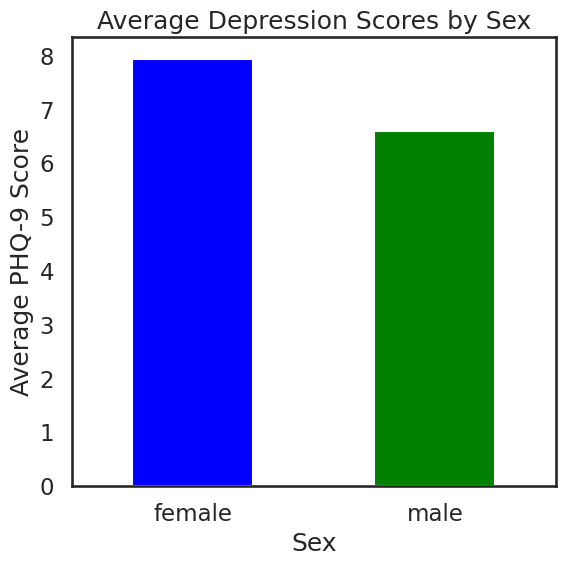

In [214]:
df_filtered = df.dropna(subset=['phq9_score', 'sex'])

average_depression_scores = df_filtered.groupby('sex')['phq9_score'].mean()

colors = ['blue', 'green', 'orange', 'red']

plt.figure(figsize=(6, 6))
average_depression_scores.plot(kind='bar', color=colors)
plt.title('Average Depression Scores by Sex')
plt.xlabel('Sex')
plt.ylabel('Average PHQ-9 Score')
plt.xticks(rotation=0)

plt.tight_layout()
male_scores = df_filtered[df_filtered['sex'] == 'male']['phq9_score']
female_scores = df_filtered[df_filtered['sex'] == 'female']['phq9_score']
plt.show()

Although this shows females had higher scores of depression, men are less likely to admit they have depression, or mental health issues, which is supported by this paper: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5734543/.


In [215]:
#anova

male_scores = df_filtered[df_filtered['sex'] == 'male']['phq9_score']
female_scores = df_filtered[df_filtered['sex'] == 'female']['phq9_score']

t_val, p_val = ttest_ind(male_scores, female_scores)
print(p_val)

3.4591203448186656e-16


The p-value is practically 0.

In [216]:
# Now lets take a closer look at the difference in
# depression scores between different types of PM users based on sex
pv = pd.pivot_table(data = df, values = 'phq9_score', index = ['sex', 'psy_use_venn'])
pv

phq9_score
sex    psy_use_venn              
female no psy use            7.67
       pm use only          14.10
       pm w/other psy       15.45
       psy w/no pm          13.06
male   no psy use            6.05
       pm use only          10.20
       pm w/other psy       11.50
       psy w/no pm          11.21

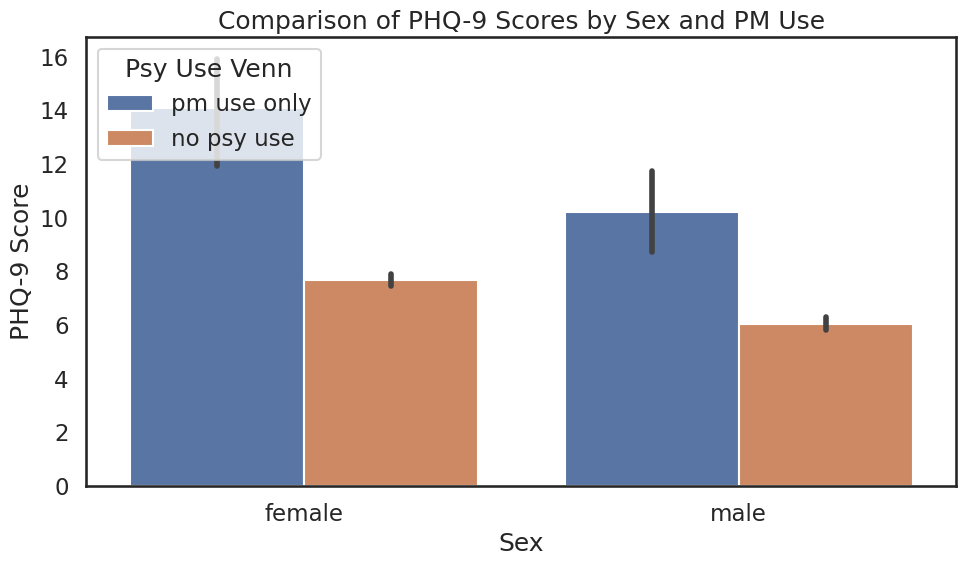

In [217]:
#plot depression rates for males and females for pm users and non pm users

df_filtered = df[df['psy_use_venn'].isin(['no psy use', 'pm use only'])]

plt.figure(figsize=(10, 6))

sns.barplot(data=df_filtered,
            x='sex',
            y='phq9_score',
            hue='psy_use_venn'
)

plt.xlabel('Sex')
plt.ylabel('PHQ-9 Score')
plt.title('Comparison of PHQ-9 Scores by Sex and PM Use')

plt.legend(title='Psy Use Venn', loc='upper left')

plt.tight_layout()
plt.show()

In [218]:
#see if theres a statistically significant difference between PM users

p_values = {}
for sex_group in df_filtered['sex'].unique():
    df_no_psy = df_filtered[(df_filtered['sex'] == sex_group) & (df_filtered['psy_use_venn'] == 'no psy use')]
    df_pm_only = df_filtered[(df_filtered['sex'] == sex_group) & (df_filtered['psy_use_venn'] == 'pm use only')]
    t_stat, p_value = stats.ttest_ind(df_no_psy['phq9_score'], df_pm_only['phq9_score'])
    p_values[sex_group] = p_value


print("P-values for each sex:")
for sex_group, p_value in p_values.items():
    print(f"{sex_group}: {p_value}")

P-values for each sex:
female: 5.712442678226118e-09
male: 1.8214098939424477e-08


**Analysis:** For both males and females, PM users demonstrate significantly higher rates of depression than non-PM users according to these plots.

#### **IV. Depression Scores by Income**




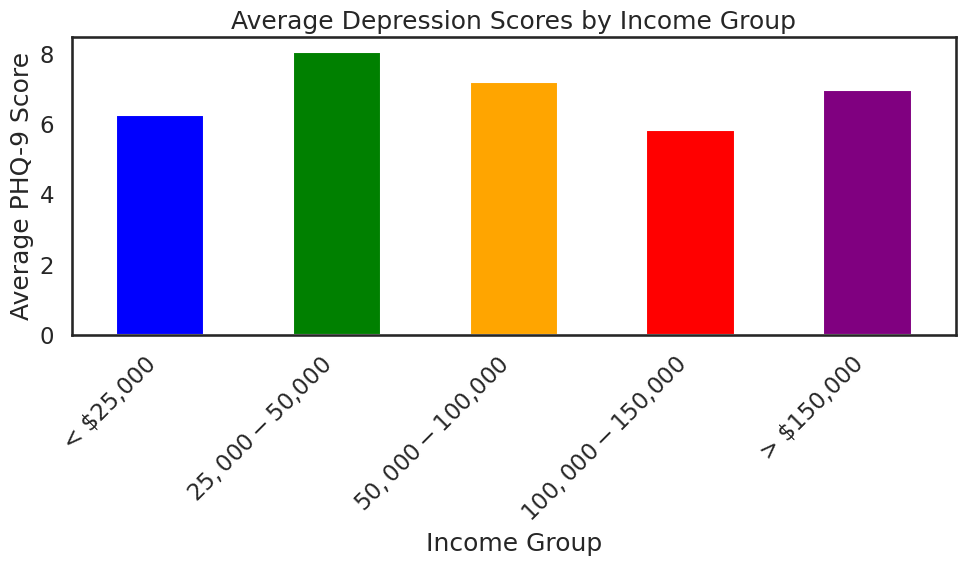

In [219]:
df_filtered = df.dropna(subset=['phq9_score', 'income'])

#create different income brackets (somewhat arbitrary, but should work given the statistics obtained earlier)
income_bins = [0, 25000, 50000, 100000, 150000, float('inf')]

income_labels = ['< $25,000', '$25,000 - $50,000', '$50,000 - $100,000', '$100,000 - $150,000', '> $150,000']

df_filtered['IncomeGroup'] = pd.cut(df_filtered['income'], bins=income_bins, labels=income_labels, right=False)

average_depression_scores = df_filtered.groupby('IncomeGroup')['phq9_score'].mean()

colors = ['blue', 'green', 'orange', 'red', 'purple']

plt.figure(figsize=(10, 6))
average_depression_scores.plot(kind='bar', color=colors)
plt.title('Average Depression Scores by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Average PHQ-9 Score')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [220]:
#anova

income_groups = [df_filtered[df_filtered['IncomeGroup'] == label]['phq9_score'] for label in income_labels]
f_statistic, p_value = f_oneway(*income_groups)

print(p_value)

6.1961622439324135e-12


There seems to be a statistically significant difference between depression scores for different income brackets. It's interesting to note that PHQ-9 scores seem to slightly decrease as income increases, but spikes again in the $150,000+ bracket. This could possibly imply that those of higher incomes might have more stressful jobs.

<ipython-input-221-3d803066865d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['income_group'] = pd.cut(df_filtered['income'], bins=income_brackets, labels=income_labels, right=False)


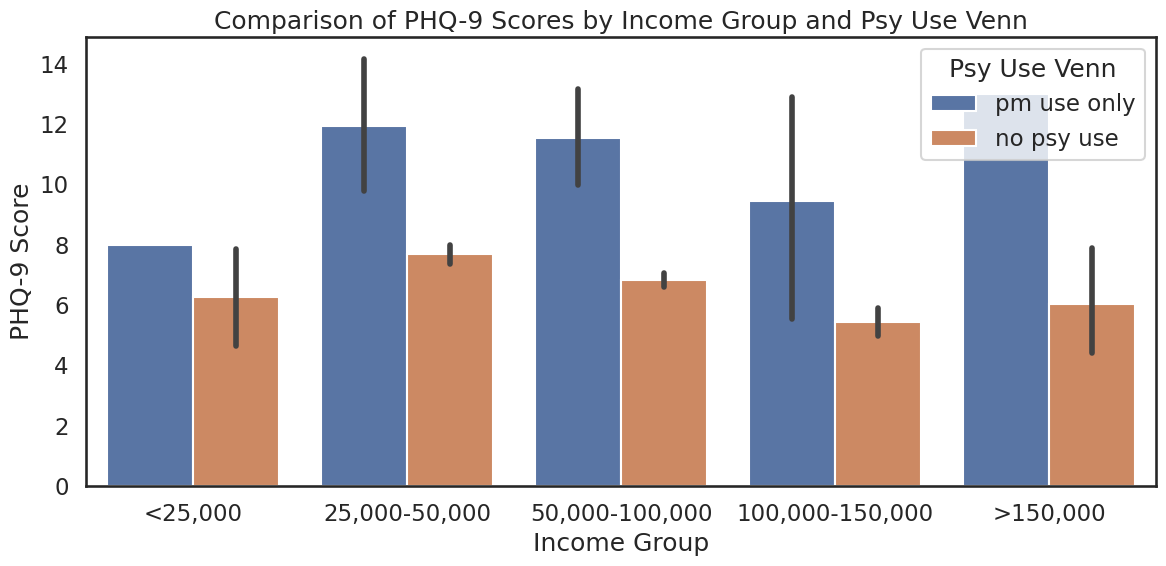

In [221]:
#plot depression rates for psychadelic users and non-PM users across different income groups

df_filtered = df[df['psy_use_venn'].isin(['no psy use', 'pm use only'])]

income_brackets = [0, 25000, 50000, 100000, 150000, float('inf')]
income_labels = ['<25,000', '25,000-50,000', '50,000-100,000', '100,000-150,000', '>150,000']

df_filtered['income_group'] = pd.cut(df_filtered['income'], bins=income_brackets, labels=income_labels, right=False)

plt.figure(figsize=(12, 6))

sns.barplot(data=df_filtered,
            x='income_group',
            y='phq9_score',
            hue='psy_use_venn')

plt.xlabel('Income Group')
plt.ylabel('PHQ-9 Score')
plt.title('Comparison of PHQ-9 Scores by Income Group and Psy Use Venn')

plt.legend(title='Psy Use Venn', loc='upper right')

plt.tight_layout()
plt.show()

In [222]:
#see if theres statistically significant difference between pm use and non pm use

p_values = {}
for income_group in income_labels:
    df_no_psy = df_filtered[(df_filtered['income_group'] == income_group) & (df_filtered['psy_use_venn'] == 'no psy use')]
    df_pm_only = df_filtered[(df_filtered['income_group'] == income_group) & (df_filtered['psy_use_venn'] == 'pm use only')]
    t_stat, p_value = stats.ttest_ind(df_no_psy['phq9_score'], df_pm_only['phq9_score'])
    p_values[income_group] = p_value

print("P-values for each income bracket:")
for income_group, p_value in p_values.items():
    print(f"{income_group}: {p_value}")

P-values for each income bracket:
<25,000: nan
25,000-50,000: 0.00012364582279559365
50,000-100,000: 1.5574256984297323e-08
100,000-150,000: 0.0402170278942819
>150,000: nan


<ipython-input-222-7fd71fb6c725>:7: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_stat, p_value = stats.ttest_ind(df_no_psy['phq9_score'], df_pm_only['phq9_score'])
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: divide by zero encountered in true_divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1214: RuntimeWarning: invalid value encountered in double_scalars
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


**Analysis:** Based on these plots, it seems that PHQ-9 scores appear significantly elevated in PM users no matter the income group. We were unable to obtain p-values for the <25,000 and >150,000 income brackets, but this is likely due to issues with the sample size.

#### **IV. Depression Scores by Region**


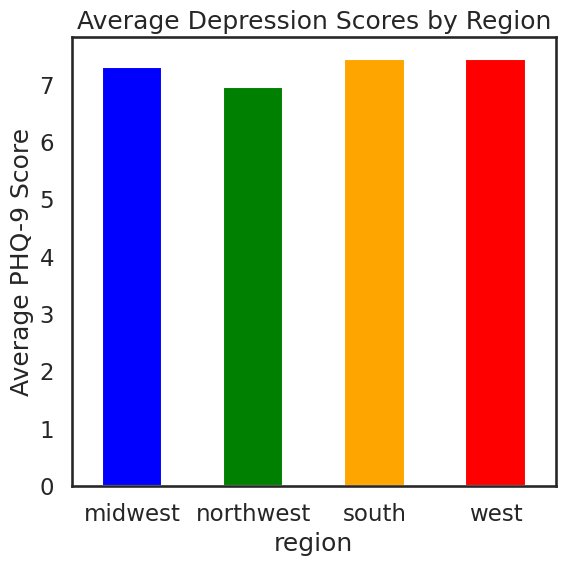

In [223]:
df_filtered = df.dropna(subset=['phq9_score', 'region'])

average_depression_scores = df_filtered.groupby('region')['phq9_score'].mean()

colors = ['blue', 'green', 'orange', 'red']

plt.figure(figsize=(6, 6))
average_depression_scores.plot(kind='bar', color=colors)
plt.title('Average Depression Scores by Region')
plt.xlabel('region')
plt.ylabel('Average PHQ-9 Score')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

In [224]:
#anova

group1 = df_filtered[df_filtered['region'] == 'midwest']['phq9_score']
group2 = df_filtered[df_filtered['region'] == 'northwest']['phq9_score']
group3 = df_filtered[df_filtered['region'] == 'south']['phq9_score']
group4 = df_filtered[df_filtered['region'] == 'west']['phq9_score']

f_statistic, p_value = f_oneway(group1, group2, group3, group4)

print(p_value)

0.2030765834010531


The differences in PHQ-9 scores by region seem to be minimal, which is supported by the p-value of 0.20.

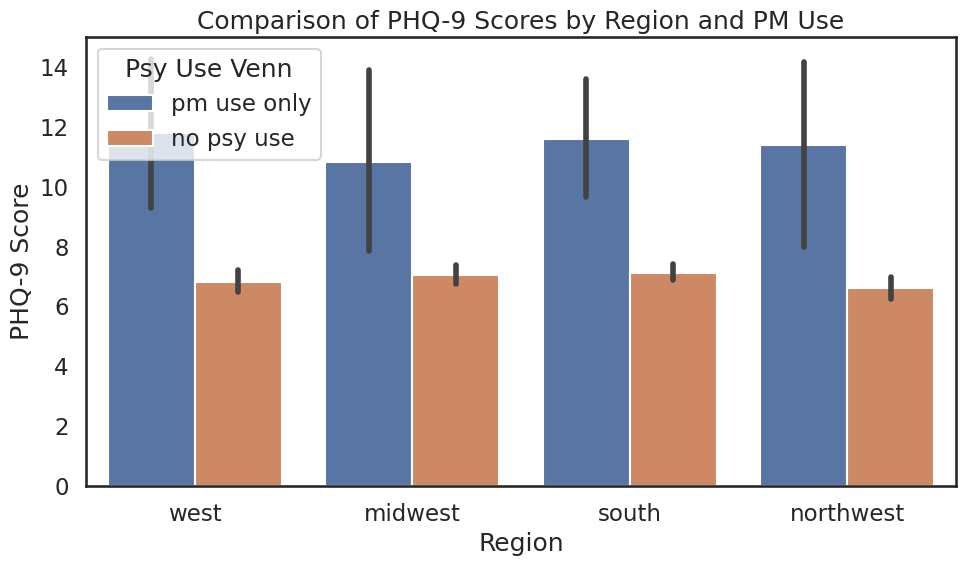

In [225]:
#create a plot to explore the relationship between depression scores in PM users vs non-PM users across various regions.

df_filtered = df[df['psy_use_venn'].isin(['no psy use', 'pm use only'])]

plt.figure(figsize=(10, 6))

sns.barplot(data=df_filtered,
            x='region',
            y='phq9_score',
            hue='psy_use_venn')

plt.xlabel('Region')
plt.ylabel('PHQ-9 Score')
plt.title('Comparison of PHQ-9 Scores by Region and PM Use')

plt.legend(title='Psy Use Venn', loc='upper left')

plt.tight_layout()
plt.show()

In [226]:
#see if theres a statistically significant difference between PM users and non pm users

p_values = {}
for region_group in df_filtered['region'].unique():
    df_no_psy = df_filtered[(df_filtered['region'] == region_group) & (df_filtered['psy_use_venn'] == 'no psy use')]
    df_pm_only = df_filtered[(df_filtered['region'] == region_group) & (df_filtered['psy_use_venn'] == 'pm use only')]
    t_stat, p_value = stats.ttest_ind(df_no_psy['phq9_score'], df_pm_only['phq9_score'])
    p_values[region_group] = p_value


print("P-values for each region:")
for region_group, p_value in p_values.items():
    print(f"{region_group}: {p_value}")

P-values for each region:
west: 7.583530012206544e-06
midwest: 0.013583442376064245
south: 7.960741150033237e-06
northwest: 0.01066015433319594


**Analysis:** Based on these plots, it seems that PHQ-9 scores appear significantly elevated in PM users no matter the region.


## Additional Statistical Analysis


```
For this portion of our project we will be preforming multiple regression models to further
inspect the relationship between different factors. We also created some summary bargraphs and pivot tables.
```



## Anxiety

#### **Multiple Regression Model**


```
Using a MRM we can assess the relationship between anxiety and psychedelic usage as predictors of depression.
```



In [227]:
outcome_1, predictors_1 = patsy.dmatrices('phq9_score ~ anxiety + psy_use_venn', data = df)

mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()

print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:             phq9_score   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     481.4
Date:                Sat, 05 Aug 2023   Prob (F-statistic):               0.00
Time:                        22:44:31   Log-Likelihood:                -23162.
No. Observations:                7139   AIC:                         4.633e+04
Df Residuals:                    7134   BIC:                         4.637e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

**Analysis**: From our results it seems that all features are a predictor of depression since their p- values are less than 0.01. However, we can say anxiety plays a role with greater confidence given that the standard error is significantly lower.

## Chronic Pain

#### **Summary of Chronic Pain & Depression scores**

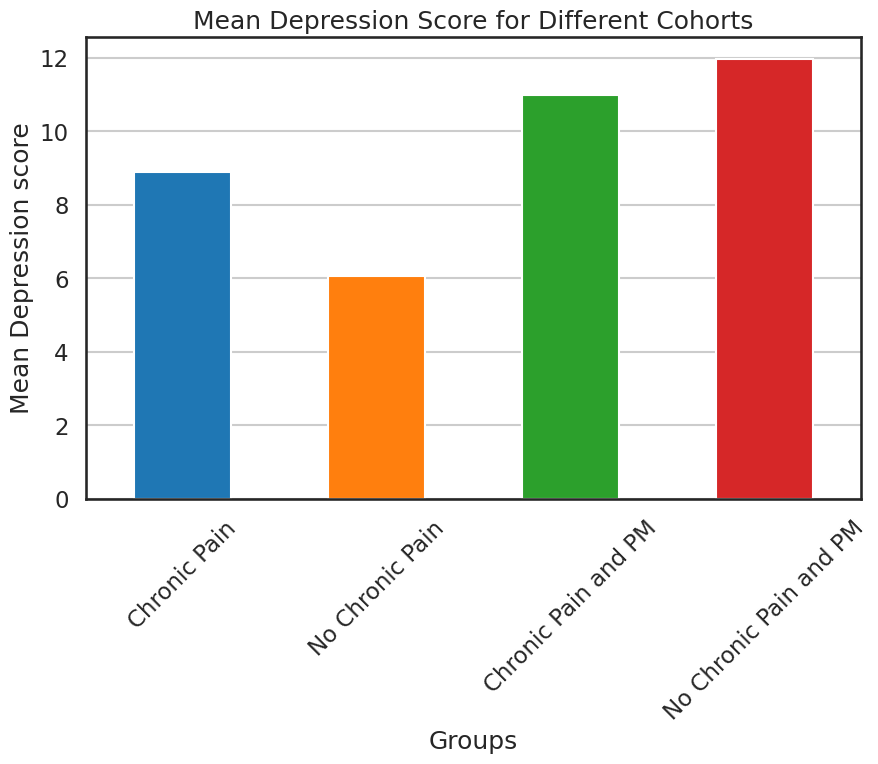

In [228]:
chronic_pain = df[df["chronic_pain"] == 'yes']
no_chronic_pain = df[df["chronic_pain"] == 'no']

chronic_pain_and_PM = df[(df["chronic_pain"] == 'yes') & (df["psy_use_venn"] == 'pm use only')]
no_chronic_pain_and_PM = df[(df["chronic_pain"] == 'no') & (df["psy_use_venn"] == 'pm use only')]

mean_scores = {
    "Chronic Pain": chronic_pain['phq9_score'].mean(),
    "No Chronic Pain": no_chronic_pain['phq9_score'].mean(),
    "Chronic Pain and PM": chronic_pain_and_PM['phq9_score'].mean(),
    "No Chronic Pain and PM": no_chronic_pain_and_PM['phq9_score'].mean(),
}

mean_scores_series = pd.Series(mean_scores)

plt.figure(figsize=(10, 6))
mean_scores_series.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.xlabel('Groups')
plt.ylabel('Mean Depression score')
plt.title('Mean Depression Score for Different Cohorts')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

**Analysis**: *Psychedelic mushroom users with chronic pain suprisingly have lower depression scores than PM users without chronic pain.*

#### **Multiple Regression Model**

In [229]:
outcome_1, predictors_1 = patsy.dmatrices('phq9_score ~ chronic_pain + psy_use_venn', data = df)

mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()

print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:             phq9_score   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     142.7
Date:                Sat, 05 Aug 2023   Prob (F-statistic):          1.61e-117
Time:                        22:44:31   Log-Likelihood:                -23740.
No. Observations:                7139   AIC:                         4.749e+04
Df Residuals:                    7134   BIC:                         4.753e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

## Insomnia


```
Using a MRM we can assess the relationship between insomnia and psychedelic usage as predictors of depression.
```



In [230]:
outcome_1, predictors_1 = patsy.dmatrices('phq9_score ~ insomnia + psy_use_venn', data = df)

mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()

print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:             phq9_score   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     235.1
Date:                Sat, 05 Aug 2023   Prob (F-statistic):          6.33e-190
Time:                        22:44:31   Log-Likelihood:                -23573.
No. Observations:                7139   AIC:                         4.716e+04
Df Residuals:                    7134   BIC:                         4.719e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

**Analysis**: According to our MRM all factors have significant influence on predicting depression with insomnia being the most confident predictor.

# Conclusion & Discussion


**Results and Findings**

Despite our initial hypothesis, which suggested that psychadelic use might reduce depression, our data did not support this notion for the majority of the features we analyzed. It actually seemed that there was an inverse correlation between psychedelic use and depression for essentially factors we analyzed, which is contrary to our initial hypothesis and the literature we initially read. The differences were quite pronounced in many cases. In other words, it appears that psychadelic mushroom use may actually increase depression or at least there may be a notable relationship here, but it's still difficult to say whether this is the case.

In addition, in order to more deeply analyze our initial findings, we see if individuals with and without certain pre-existing health conditions (anxiety, chronic pain, and insomnia) react differently to psychadelic mushrooms. Among PM users, those with anxiety and insomnia demonstrated higher PHQ-9 scores than those without these conditions; however, interestingly, those reporting chronic pain reported PHQ-9 scores that lower than those who didn't by a very slight amount. This is a particularly intriguing result that we did not originally set out to find.

Also, rates of depression can vary immensely among different demographics. This is supported by the hypothesis tests we ran. Some interesting findings were that women report higher PHQ-9 scores than men, which can possibly be linked to the fact that men are less likely to report mental health conditions, which is supported by an NIH publication we found. We also found that PHQ-9 scores continually decreased by age, which could possibly be due to the fact that younger people may be facing more uncertainty. We also noted that for income, PHQ-9 scores seemed to slightly decrease as income increased, but spiked again in the highest income bracket, leading us to believe that those with higher incomes may have more stressful jobs.

**Answering the Research Question**

Our primary research question was whether the use of psychedelic mushrooms (PM) decreases or increases the occurrence of depression among adults with depression. Our experiments actually seemed to show an increase in depression among psychedelic mushroom users versus non-psychedelic mushroom users, which completely contradicts both our intuition and the papers we read. Despite not arriving at a definitive conclusion, our analysis has provided valuable insights. While we were unable to establish a clear link between PM use and depression reduction, the observed correlation with chronic pain and depression opens up new avenues for exploration.

Additionally, we have identified various variables in publicly accessible datasets that could be valuable for investigating the relationship between psychedelic mushrooms and depression. This sets the stage for further comprehensive research that may provide more conclusive answers.

**Limitations**

It is crucial to acknowledge the limitations of our study to interpret the results with caution. One significant limitation is the lack of data from a controlled study. As our data is not derived from a carefully controlled experimental setting, there might be confounding factors and biases that could influence the outcomes. As such, the reliability and generalizability of our findings may be affected.

**Future Directions**

The current study has opened up intriguing possibilities for future research. Given the unexpected relationship between psychedelic mushrooms and depression, further investigations should focus on understanding the underlying mechanisms behind this phenomenon. Controlled studies and clinical trials can provide more robust evidence and help establish a causal relationship, if any, between psychedelic mushroom use and depression reduction in individuals with chronic pain.

Furthermore, exploring potential therapeutic applications of psychedelic mushrooms in the context of mental health warrants attention. As psychedelic-assisted therapies gain interest in the scientific community, it is essential to conduct rigorous studies to determine their safety, efficacy, and appropriate guidelines for use.

In addition, our findings also emphasize the mental health disparities between different communities, which can serve as a call to deploy more resources towards those who may be more suspectible to certain mental health conditions such as depression.

Overall, our findings call for a multi-faceted approach to studying psychedelic substances and their potential impact on mental health, and they encourage collaboration between various fields of research for a more comprehensive understanding of these intriguing relationships.